Ref: https://github.com/SHI-Labs/OneFormer/tree/main/datasets
```
cityscapes/
  gtFine/
    train/
      aachen/
        color.png, instanceIds.png, labelIds.png, polygons.json,
        labelTrainIds.png
      ...
    val/
    test/
    # below are generated Cityscapes panoptic annotation
    cityscapes_panoptic_train.json
    cityscapes_panoptic_train/
    cityscapes_panoptic_val.json
    cityscapes_panoptic_val/
    cityscapes_panoptic_test.json
    cityscapes_panoptic_test/
  leftImg8bit/
    train/
    val/
    test/
```

In [1]:
from pathlib import Path

datasets_path = Path("/content/datasets")
cityscapes_path = datasets_path / "cityscapes"

if cityscapes_path.exists():
    print(f"{cityscapes_path} Path exists")
else:
    print(f"{cityscapes_path} Path doesnt exist.. Creating One!")
    cityscapes_path.mkdir(parents=True, exist_ok=True)

/content/datasets/cityscapes Path doesnt exist.. Creating One!


In [2]:
import os
os.environ["DETECTRON2_DATASETS"] = "/content/datasets"

In [3]:
# !wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=yourmailid&password=yourpwd&submit=Login' https://www.cityscapes-dataset.com/login/
# ######## gtFine
# !wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=1
# ######## leftImg8bit
# !wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=3


--2024-07-08 21:38:41--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2024-07-08 21:38:41--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [ <=>                ]  57.34K   298KB/s    in 0.2s    

2024-07-08 21:38:42 (298 KB/s) - ‘index.html’ saved [58715]

--2024-07-08 21:38:42--  https://www.cityscapes-dataset.com/file-handling/?packageID=3
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8

In [4]:
!unzip -n /content/gtFine_trainvaltest.zip -d ./datasets/cityscapes
# !rm /content/gtFine_trainvaltest.zip
!echo "Dataset downloaded."

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/cityscapes/gtFine/test/berlin/berlin_000114_000019_gtFine_color.png  
  inflating: ./datasets/cityscapes/gtFine/test/berlin/berlin_000434_000019_gtFine_labelIds.png  
  inflating: ./datasets/cityscapes/gtFine/test/berlin/berlin_000420_000019_gtFine_color.png  
  inflating: ./datasets/cityscapes/gtFine/test/berlin/berlin_000483_000019_gtFine_instanceIds.png  
  inflating: ./datasets/cityscapes/gtFine/test/berlin/berlin_000420_000019_gtFine_instanceIds.png  
  inflating: ./datasets/cityscapes/gtFine/test/berlin/berlin_000254_000019_gtFine_color.png  
  inflating: ./datasets/cityscapes/gtFine/test/berlin/berlin_000490_000019_gtFine_color.png  
  inflating: ./datasets/cityscapes/gtFine/test/berlin/berlin_000448_000019_gtFine_polygons.json  
  inflating: ./datasets/cityscapes/gtFine/test/berlin/berlin_000099_000019_gtFine_labelIds.png  
  inflating: ./datasets/cityscapes/gtFine/test/berlin/berlin_000068_000019_gtFine

In [5]:
!unzip /content/leftImg8bit_trainvaltest.zip -d ./datasets/cityscapes
# !rm /content/leftImg8bit_trainvaltest.zip
!echo "Dataset downloaded."

Streaming output truncated to the last 5000 lines.
 extracting: ./datasets/cityscapes/leftImg8bit/train/jena/jena_000040_000019_leftImg8bit.png  
 extracting: ./datasets/cityscapes/leftImg8bit/train/jena/jena_000020_000019_leftImg8bit.png  
 extracting: ./datasets/cityscapes/leftImg8bit/train/jena/jena_000030_000019_leftImg8bit.png  
 extracting: ./datasets/cityscapes/leftImg8bit/train/jena/jena_000005_000019_leftImg8bit.png  
 extracting: ./datasets/cityscapes/leftImg8bit/train/jena/jena_000059_000019_leftImg8bit.png  
 extracting: ./datasets/cityscapes/leftImg8bit/train/jena/jena_000100_000019_leftImg8bit.png  
 extracting: ./datasets/cityscapes/leftImg8bit/train/jena/jena_000034_000019_leftImg8bit.png  
 extracting: ./datasets/cityscapes/leftImg8bit/train/jena/jena_000089_000019_leftImg8bit.png  
 extracting: ./datasets/cityscapes/leftImg8bit/train/jena/jena_000104_000019_leftImg8bit.png  
 extracting: ./datasets/cityscapes/leftImg8bit/train/jena/jena_000107_000019_leftImg8bit.png  

In [6]:
#Install cityscapes scripts
!pip install git+https://github.com/mcordts/cityscapesScripts.git

  Cloning https://github.com/mcordts/cityscapesScripts.git to /tmp/pip-req-build-kww84svs
  Running command git clone --filter=blob:none --quiet https://github.com/mcordts/cityscapesScripts.git /tmp/pip-req-build-kww84svs
  Resolved https://github.com/mcordts/cityscapesScripts.git to commit cf14a15f14bb868c5a9f14acab5ef3120b97df32
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.7 MB/s eta 0:00:00
  Created wheel for cityscapesScripts: filename=cityscapesScripts-2.2.3-py3-none-any.whl size=473585 sha256=e67f0c991e72a9051a190ea1aa275eebdfba6e1829b5e70482c9a95f053b6aa6
  Stored in directory: /tmp/pip-ephem-wheel-cache-c7row1cg/wheels/97/88/45/41eefc6dfa13cb6ac29245174b8ca07c823b263aa8f989a12e
  Created wheel for typing: filename=typing-3.

In [7]:
!git clone https://github.com/mcordts/cityscapesScripts.git

Cloning into 'cityscapesScripts'...
remote: Enumerating objects: 648, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 648 (delta 184), reused 165 (delta 155), pack-reused 427
Receiving objects: 100% (648/648), 796.28 KiB | 16.59 MiB/s, done.
Resolving deltas: 100% (370/370), done.


In [5]:
#create labelTrainIds.png, these files are not needed for instance segmentation.
import os
os.environ["CITYSCAPES_DATASET"] = "/content/datasets/cityscapes"
!python cityscapesScripts/cityscapesscripts/preparation/createTrainIdLabelImgs.py

Processing 5000 annotation files
Progress: 100.0 % 

In [6]:
#generate Cityscapes panoptic dataset. #These files are not needed for semantic and instance segmentation.
!python cityscapesScripts/cityscapesscripts/preparation/createPanopticImgs.py

Converting 500 annotation files for val set.
Json file with the annotations in panoptic format will be saved in /content/datasets/cityscapes/gtFine/cityscapes_panoptic_val.json
Creating folder /content/datasets/cityscapes/gtFine/cityscapes_panoptic_val for panoptic segmentation PNGs
Corresponding segmentations in .png format will be saved in /content/datasets/cityscapes/gtFine/cityscapes_panoptic_val
Progress: 100.00 % 
Saving the json file /content/datasets/cityscapes/gtFine/cityscapes_panoptic_val.json
Converting 2975 annotation files for train set.
Json file with the annotations in panoptic format will be saved in /content/datasets/cityscapes/gtFine/cityscapes_panoptic_train.json
Creating folder /content/datasets/cityscapes/gtFine/cityscapes_panoptic_train for panoptic segmentation PNGs
Corresponding segmentations in .png format will be saved in /content/datasets/cityscapes/gtFine/cityscapes_panoptic_train
Progress: 100.00 % 
Saving the json file /content/datasets/cityscapes/gtFine/

In [ ]:
# import shutil
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# # Specify the paths
# source_path = '/content/datasets/cityscapes'  # path of directory that needs to be zipped
# destination_path = '/content/drive/MyDrive/Colab Notebooks/Master Thesis/Data/'  # destination path in google drive
# zip_filename = 'cityscapes' #saves the data from source path to drive path using this name

# # Zip the data files
# shutil.make_archive(destination_path + zip_filename, 'zip', source_path)

# # Optional: If you want to remove the original files after zipping
# #shutil.rmtree(source_path)

# # Optional: Unmount Google Drive (if you don't need it anymore)
# drive.flush_and_unmount()

Mounted at /content/drive


In [8]:
!pip install datasets transformers

  Using cached datasets-2.20.0-py3-none-any.whl (547 kB)
  Using cached pyarrow-16.1.0-cp310-cp310-manylinux_2_28_x86_64.whl (40.8 MB)
  Using cached dill-0.3.8-py3-none-any.whl (116 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached xxhash-3.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (194 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl (134 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatib

In [7]:
from huggingface_hub import login
from google.colab import userdata

login(token=userdata.get('HF_TOKEN'))

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [1]:
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_cityscapes_dataset_dict(data_root):
    #dataset_dict = {"image": [], "annotation": [], "panoptic_json": [], "split": []}
    dataset_dict = {"image": [], "annotation": [], "split": [], "image_name": []}
    splits = ["train", "val", "test"]

    for split in splits:
        image_dir = os.path.join(data_root, "leftImg8bit", split)
        annotation_dir = os.path.join(data_root, "gtFine", f"cityscapes_panoptic_{split}")
        # Iterate over cities and images in the split
        for city_folder in os.listdir(image_dir):
            city_path = os.path.join(image_dir, city_folder)
            for image_file in os.listdir(city_path):
                image_path = os.path.join(city_path, image_file)

                # Name
                if image_file.endswith("_leftImg8bit.png"):
                    # Remove the suffix "_leftImg8bit.png" from the file name
                    image_name = image_file.replace("_leftImg8bit.png", "")
                    print(image_name)
                annotation_file = image_file.replace("_leftImg8bit.png", "_gtFine_panoptic.png")
                annotation_path = os.path.join(annotation_dir, annotation_file)

                dataset_dict["image"].append(image_path)
                dataset_dict["annotation"].append(annotation_path)
                dataset_dict["split"].append(split)
                dataset_dict["image_name"].append(image_name)
    # Sorting based on image_name to ensure consistency
    sorted_indices = np.argsort(dataset_dict["image_name"])
    for key in dataset_dict.keys():
        dataset_dict[key] = [dataset_dict[key][i] for i in sorted_indices]
    return dataset_dict


# Create DatasetDict for Cityscapes
data_root = "/content/datasets/cityscapes"
cityscapes_dataset_dict = create_cityscapes_dataset_dict(data_root)

def create_dataset(image_paths, label_paths, image_names):
    dataset = Dataset.from_dict({"image": image_paths,
                                "panoptic_mask_label": label_paths,
                                 "image_name": image_names})
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("panoptic_mask_label", Image())
    return dataset


train_dict = {k: [x for i, x in enumerate(v) if cityscapes_dataset_dict['split'][i]=='train']
                                      for k, v in cityscapes_dataset_dict.items()}
train_dataset = create_dataset(train_dict["image"], train_dict["annotation"], train_dict["image_name"])
val_dict = {k: [x for i, x in enumerate(v) if cityscapes_dataset_dict['split'][i]=='val']
                                      for k, v in cityscapes_dataset_dict.items()}
val_dataset = create_dataset(val_dict["image"], val_dict["annotation"], val_dict["image_name"])
test_dict = {k: [x for i, x in enumerate(v) if cityscapes_dataset_dict['split'][i]=='test']
                                      for k, v in cityscapes_dataset_dict.items()}
test_dataset = create_dataset(test_dict["image"], test_dict["annotation"], test_dict["image_name"])

dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
})


erfurt_000101_000019
erfurt_000023_000019
erfurt_000012_000019
erfurt_000060_000019
erfurt_000040_000019
erfurt_000094_000019
erfurt_000044_000019
erfurt_000082_000019
erfurt_000031_000019
erfurt_000100_000019
erfurt_000011_000019
erfurt_000103_000019
erfurt_000078_000019
erfurt_000015_000019
erfurt_000024_000019
erfurt_000019_000019
erfurt_000071_000019
erfurt_000084_000019
erfurt_000086_000019
erfurt_000091_000019
erfurt_000064_000019
erfurt_000033_000019
erfurt_000049_000019
erfurt_000054_000019
erfurt_000067_000019
erfurt_000075_000019
erfurt_000046_000019
erfurt_000027_000019
erfurt_000005_000019
erfurt_000090_000019
erfurt_000037_000019
erfurt_000038_000019
erfurt_000087_000019
erfurt_000108_000019
erfurt_000058_000019
erfurt_000088_000019
erfurt_000050_000019
erfurt_000016_000019
erfurt_000007_000019
erfurt_000010_000019
erfurt_000095_000019
erfurt_000036_000019
erfurt_000034_000019
erfurt_000068_000019
erfurt_000097_000019
erfurt_000032_000019
erfurt_000105_000019
erfurt_000073

In [2]:
# Push to the Hugging Face Model Hub
dataset.push_to_hub("BhavanaMalla/cityscapes-panoptic", private=True)

Uploading the dataset shards:   0%|          | 0/14 [00:00<?, ?it/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/167 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/167 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/166 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/7 [00:00<?, ?it/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/217 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/565 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/cityscapes-panoptic/commit/d5ec5649f487576b0566a27b17663d85a75c3e75', commit_message='Upload dataset', commit_description='', oid='d5ec5649f487576b0566a27b17663d85a75c3e75', pr_url=None, pr_revision=None, pr_num=None)

In [3]:
dataset, dataset["train"].features

(DatasetDict({
     train: Dataset({
         features: ['image', 'panoptic_mask_label', 'image_name'],
         num_rows: 2975
     })
     validation: Dataset({
         features: ['image', 'panoptic_mask_label', 'image_name'],
         num_rows: 500
     })
     test: Dataset({
         features: ['image', 'panoptic_mask_label', 'image_name'],
         num_rows: 1525
     })
 }),
 {'image': Image(mode=None, decode=True, id=None),
  'panoptic_mask_label': Image(mode=None, decode=True, id=None),
  'image_name': Value(dtype='string', id=None)})

In [4]:
dataset["train"][0]["image"].size, type(dataset["train"][0]["image"])

((2048, 1024), PIL.PngImagePlugin.PngImageFile)

In [5]:
dataset["train"][0]["panoptic_mask_label"].size, type(dataset["train"][0]["panoptic_mask_label"])

((2048, 1024), PIL.PngImagePlugin.PngImageFile)

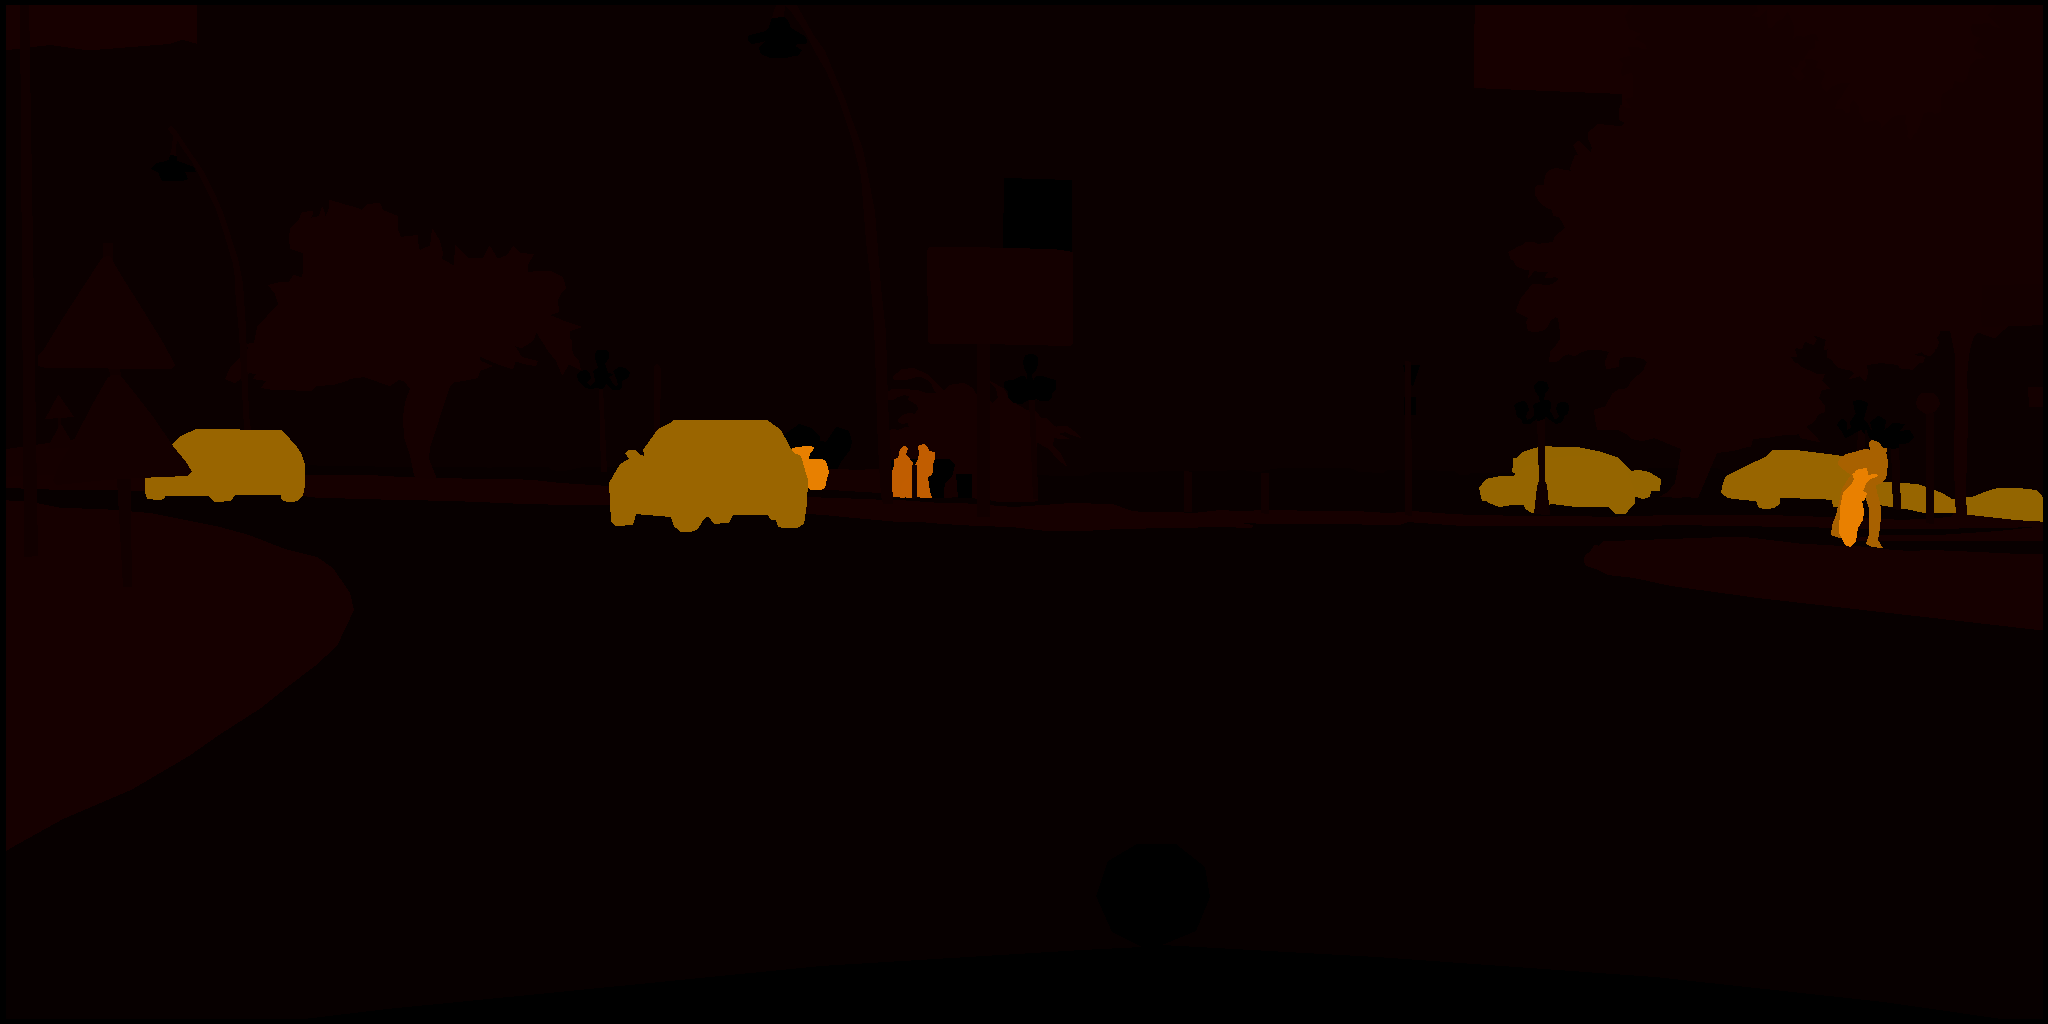

In [ ]:
dataset["train"][0]["panoptic_mask_label"]

In [ ]:
from datasets import load_dataset

cityscapes_ds = load_dataset("BhavanaMalla/cityscapes-panoptic")

cityscapes_ds

Generating train split:   0%|          | 0/2975 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1525 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'panoptic_mask_label'],
        num_rows: 2975
    })
    validation: Dataset({
        features: ['image', 'panoptic_mask_label'],
        num_rows: 500
    })
    test: Dataset({
        features: ['image', 'panoptic_mask_label'],
        num_rows: 1525
    })
})

In [ ]:
np.unique(cityscapes_ds["train"][0]["panoptic_mask_label"])

array([  0,   7,   8,  11,  17,  20,  21,  22,  23,  93,  97, 101, 128,
       147, 148, 149, 150, 151, 152, 153, 154, 168, 192, 193, 232, 233],
      dtype=uint8)

**Cityscapes semantic and instance labels**

In [6]:
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_cityscapes_dataset_dict(data_root):
    dataset_dict = {"image": [], "annotation_color": [],
                    "annotation_instanceids":[], "annotation_labelids": [],
                    "annotation_labeltrainids": [], "split": [], "image_name": []}
    splits = ["train", "val", "test"]

    for split in splits:
        image_dir = os.path.join(data_root, "leftImg8bit", split)
        annotation_dir = os.path.join(data_root, "gtFine", split)

        # Iterate over cities and images in the split
        for city_folder in os.listdir(image_dir):
            city_path = os.path.join(image_dir, city_folder)
            for image_file in os.listdir(city_path):
                image_path = os.path.join(city_path, image_file)
                 # Name
                if image_file.endswith("_leftImg8bit.png"):  # Ensure it matches the specific suffix
                    # Remove the suffix "_leftImg8bit.png" from the file name
                    image_name = image_file.replace("_leftImg8bit.png", "")
                    print(image_name)  # This will print the desired name
                # Annotations
                annotation_color_file = image_file.replace("_leftImg8bit.png", "_gtFine_color.png")
                annotation_instanceids_file = image_file.replace("_leftImg8bit.png", "_gtFine_instanceIds.png")
                annotation_labelids_file = image_file.replace("_leftImg8bit.png", "_gtFine_labelIds.png")
                annotation_labeltrainids_file = image_file.replace("_leftImg8bit.png", "_gtFine_labelTrainIds.png")
                # annotation_json_file = image_file.replace("_leftImg8bit.png", "_gtFine_polygons.json")

                annotation_color_path = os.path.join(annotation_dir, city_folder, annotation_color_file)
                annotation_instanceids_path = os.path.join(annotation_dir, city_folder, annotation_instanceids_file)
                annotation_labelids_path = os.path.join(annotation_dir, city_folder, annotation_labelids_file)
                annotation_labeltrainids_path = os.path.join(annotation_dir, city_folder, annotation_labeltrainids_file)
                # annotation_json_path = os.path.join(annotation_dir, city_folder, annotation_json_file)
                # with open(annotation_json_path, "r") as json_file:
                #     json_content = json.load(json_file)

                dataset_dict["image"].append(image_path)
                dataset_dict["annotation_color"].append(annotation_color_path)
                dataset_dict["annotation_instanceids"].append(annotation_instanceids_path)
                dataset_dict["annotation_labelids"].append(annotation_labelids_path)
                dataset_dict["annotation_labeltrainids"].append(annotation_labeltrainids_path)
                # dataset_dict["annotation_json"].append(json_content)
                dataset_dict["split"].append(split)
                dataset_dict["image_name"].append(image_name)

    # Sorting based on image_name to ensure consistency
    sorted_indices = np.argsort(dataset_dict["image_name"])
    for key in dataset_dict.keys():
        dataset_dict[key] = [dataset_dict[key][i] for i in sorted_indices]
    return dataset_dict


# Create DatasetDict for Cityscapes
data_root = "/content/datasets/cityscapes"
cityscapes_dataset_dict = create_cityscapes_dataset_dict(data_root)
print(cityscapes_dataset_dict.keys())
def create_dataset(image_paths, annotation_color, annotation_instanceids,
                   annotation_labelids, annotation_labeltrainids, image_names, annotation_json=None):
    dataset = Dataset.from_dict({"image": image_paths,
                                "annotation_color": annotation_color,
                                "annotation_instanceids": annotation_instanceids,
                                "annotation_labelids": annotation_labelids,
                                "annotation_labeltrainids": annotation_labeltrainids,
                                "image_name": image_names,
                                })
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("annotation_color", Image())
    dataset = dataset.cast_column("annotation_instanceids", Image())
    dataset = dataset.cast_column("annotation_labelids", Image())
    dataset = dataset.cast_column("annotation_labeltrainids", Image())
    return dataset


train_dict = {k: [x for i, x in enumerate(v) if cityscapes_dataset_dict['split'][i]=='train']
                                      for k, v in cityscapes_dataset_dict.items()}
train_dataset = create_dataset(train_dict["image"],
                               train_dict["annotation_color"],
                               train_dict["annotation_instanceids"],
                               train_dict["annotation_labelids"],
                               train_dict["annotation_labeltrainids"],
                               train_dict["image_name"],
                            #    train_dict["annotation_json"]
                               )
val_dict = {k: [x for i, x in enumerate(v) if cityscapes_dataset_dict['split'][i]=='val']
                                      for k, v in cityscapes_dataset_dict.items()}
val_dataset = create_dataset(val_dict["image"],
                               val_dict["annotation_color"],
                               val_dict["annotation_instanceids"],
                               val_dict["annotation_labelids"],
                               val_dict["annotation_labeltrainids"],
                               val_dict["image_name"],
                            #    val_dict["annotation_json"]
                             )
test_dict = {k: [x for i, x in enumerate(v) if cityscapes_dataset_dict['split'][i]=='test']
                                      for k, v in cityscapes_dataset_dict.items()}
test_dataset = create_dataset(test_dict["image"],
                               test_dict["annotation_color"],
                               test_dict["annotation_instanceids"],
                               test_dict["annotation_labelids"],
                               test_dict["annotation_labeltrainids"],
                               test_dict["image_name"],
                            #    test_dict["annotation_json"]
                              )

dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
})

Streaming output truncated to the last 5000 lines.
erfurt_000023_000019
erfurt_000012_000019
erfurt_000060_000019
erfurt_000040_000019
erfurt_000094_000019
erfurt_000044_000019
erfurt_000082_000019
erfurt_000031_000019
erfurt_000100_000019
erfurt_000011_000019
erfurt_000103_000019
erfurt_000078_000019
erfurt_000015_000019
erfurt_000024_000019
erfurt_000019_000019
erfurt_000071_000019
erfurt_000084_000019
erfurt_000086_000019
erfurt_000091_000019
erfurt_000064_000019
erfurt_000033_000019
erfurt_000049_000019
erfurt_000054_000019
erfurt_000067_000019
erfurt_000075_000019
erfurt_000046_000019
erfurt_000027_000019
erfurt_000005_000019
erfurt_000090_000019
erfurt_000037_000019
erfurt_000038_000019
erfurt_000087_000019
erfurt_000108_000019
erfurt_000058_000019
erfurt_000088_000019
erfurt_000050_000019
erfurt_000016_000019
erfurt_000007_000019
erfurt_000010_000019
erfurt_000095_000019
erfurt_000036_000019
erfurt_000034_000019
erfurt_000068_000019
erfurt_000097_000019
erfurt_000032_000019
erfu

In [10]:
test_dict["image_name"]

['berlin_000000_000019',
 'berlin_000001_000019',
 'berlin_000002_000019',
 'berlin_000003_000019',
 'berlin_000004_000019',
 'berlin_000005_000019',
 'berlin_000006_000019',
 'berlin_000007_000019',
 'berlin_000008_000019',
 'berlin_000009_000019',
 'berlin_000010_000019',
 'berlin_000011_000019',
 'berlin_000012_000019',
 'berlin_000013_000019',
 'berlin_000014_000019',
 'berlin_000015_000019',
 'berlin_000016_000019',
 'berlin_000017_000019',
 'berlin_000018_000019',
 'berlin_000019_000019',
 'berlin_000020_000019',
 'berlin_000021_000019',
 'berlin_000022_000019',
 'berlin_000023_000019',
 'berlin_000024_000019',
 'berlin_000025_000019',
 'berlin_000026_000019',
 'berlin_000027_000019',
 'berlin_000028_000019',
 'berlin_000029_000019',
 'berlin_000030_000019',
 'berlin_000031_000019',
 'berlin_000032_000019',
 'berlin_000033_000019',
 'berlin_000034_000019',
 'berlin_000035_000019',
 'berlin_000036_000019',
 'berlin_000037_000019',
 'berlin_000038_000019',
 'berlin_000039_000019',


In [11]:
test_dict["annotation_labeltrainids"]

['/content/datasets/cityscapes/gtFine/test/berlin/berlin_000000_000019_gtFine_labelTrainIds.png',
 '/content/datasets/cityscapes/gtFine/test/berlin/berlin_000001_000019_gtFine_labelTrainIds.png',
 '/content/datasets/cityscapes/gtFine/test/berlin/berlin_000002_000019_gtFine_labelTrainIds.png',
 '/content/datasets/cityscapes/gtFine/test/berlin/berlin_000003_000019_gtFine_labelTrainIds.png',
 '/content/datasets/cityscapes/gtFine/test/berlin/berlin_000004_000019_gtFine_labelTrainIds.png',
 '/content/datasets/cityscapes/gtFine/test/berlin/berlin_000005_000019_gtFine_labelTrainIds.png',
 '/content/datasets/cityscapes/gtFine/test/berlin/berlin_000006_000019_gtFine_labelTrainIds.png',
 '/content/datasets/cityscapes/gtFine/test/berlin/berlin_000007_000019_gtFine_labelTrainIds.png',
 '/content/datasets/cityscapes/gtFine/test/berlin/berlin_000008_000019_gtFine_labelTrainIds.png',
 '/content/datasets/cityscapes/gtFine/test/berlin/berlin_000009_000019_gtFine_labelTrainIds.png',
 '/content/datasets/

In [12]:
test_dict["image"]

['/content/datasets/cityscapes/leftImg8bit/test/berlin/berlin_000000_000019_leftImg8bit.png',
 '/content/datasets/cityscapes/leftImg8bit/test/berlin/berlin_000001_000019_leftImg8bit.png',
 '/content/datasets/cityscapes/leftImg8bit/test/berlin/berlin_000002_000019_leftImg8bit.png',
 '/content/datasets/cityscapes/leftImg8bit/test/berlin/berlin_000003_000019_leftImg8bit.png',
 '/content/datasets/cityscapes/leftImg8bit/test/berlin/berlin_000004_000019_leftImg8bit.png',
 '/content/datasets/cityscapes/leftImg8bit/test/berlin/berlin_000005_000019_leftImg8bit.png',
 '/content/datasets/cityscapes/leftImg8bit/test/berlin/berlin_000006_000019_leftImg8bit.png',
 '/content/datasets/cityscapes/leftImg8bit/test/berlin/berlin_000007_000019_leftImg8bit.png',
 '/content/datasets/cityscapes/leftImg8bit/test/berlin/berlin_000008_000019_leftImg8bit.png',
 '/content/datasets/cityscapes/leftImg8bit/test/berlin/berlin_000009_000019_leftImg8bit.png',
 '/content/datasets/cityscapes/leftImg8bit/test/berlin/berli

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'annotation_color', 'annotation_instanceids', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
        num_rows: 2975
    })
    validation: Dataset({
        features: ['image', 'annotation_color', 'annotation_instanceids', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
        num_rows: 500
    })
    test: Dataset({
        features: ['image', 'annotation_color', 'annotation_instanceids', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
        num_rows: 1525
    })
})

In [9]:
# Push to the Hugging Face Model Hub
dataset.push_to_hub("BhavanaMalla/cityscapes-instance-semantic", private=True)

Uploading the dataset shards:   0%|          | 0/15 [00:00<?, ?it/s]

Map:   0%|          | 0/199 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/199 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/199 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/199 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/199 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/198 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/198 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/198 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/198 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/198 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/198 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/198 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/198 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/198 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/198 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/167 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/167 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/166 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/7 [00:00<?, ?it/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/217 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/750 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/cityscapes-instance-semantic/commit/a7a490f8856cd02aa4e1481ac8df033728324b10', commit_message='Upload dataset', commit_description='', oid='a7a490f8856cd02aa4e1481ac8df033728324b10', pr_url=None, pr_revision=None, pr_num=None)

In [13]:
dataset, dataset["validation"].features

(DatasetDict({
     train: Dataset({
         features: ['image', 'annotation_color', 'annotation_instanceids', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
         num_rows: 2975
     })
     validation: Dataset({
         features: ['image', 'annotation_color', 'annotation_instanceids', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
         num_rows: 500
     })
     test: Dataset({
         features: ['image', 'annotation_color', 'annotation_instanceids', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
         num_rows: 1525
     })
 }),
 {'image': Image(mode=None, decode=True, id=None),
  'annotation_color': Image(mode=None, decode=True, id=None),
  'annotation_instanceids': Image(mode=None, decode=True, id=None),
  'annotation_labelids': Image(mode=None, decode=True, id=None),
  'annotation_labeltrainids': Image(mode=None, decode=True, id=None),
  'image_name': Value(dtype='string', id=None)})

In [14]:
dataset["validation"]["image_name"]

['frankfurt_000000_000294',
 'frankfurt_000000_000576',
 'frankfurt_000000_001016',
 'frankfurt_000000_001236',
 'frankfurt_000000_001751',
 'frankfurt_000000_002196',
 'frankfurt_000000_002963',
 'frankfurt_000000_003025',
 'frankfurt_000000_003357',
 'frankfurt_000000_003920',
 'frankfurt_000000_004617',
 'frankfurt_000000_005543',
 'frankfurt_000000_005898',
 'frankfurt_000000_006589',
 'frankfurt_000000_007365',
 'frankfurt_000000_008206',
 'frankfurt_000000_008451',
 'frankfurt_000000_009291',
 'frankfurt_000000_009561',
 'frankfurt_000000_009688',
 'frankfurt_000000_009969',
 'frankfurt_000000_010351',
 'frankfurt_000000_010763',
 'frankfurt_000000_011007',
 'frankfurt_000000_011074',
 'frankfurt_000000_011461',
 'frankfurt_000000_011810',
 'frankfurt_000000_012009',
 'frankfurt_000000_012121',
 'frankfurt_000000_012868',
 'frankfurt_000000_013067',
 'frankfurt_000000_013240',
 'frankfurt_000000_013382',
 'frankfurt_000000_013942',
 'frankfurt_000000_014480',
 'frankfurt_000000_0

In [ ]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [89]:
import datasets, transformers
from datasets import load_dataset

cityscapes_instance_semantic = load_dataset("BhavanaMalla/cityscapes-instance-semantic",
                                            split="validation", token="yourtoken")

In [90]:
cityscapes_instance_semantic

Dataset({
    features: ['image', 'annotation_color', 'annotation_instanceids', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
    num_rows: 500
})

In [91]:
cityscapes_instance_semantic[0]["image"]

Output hidden; open in https://colab.research.google.com to view.

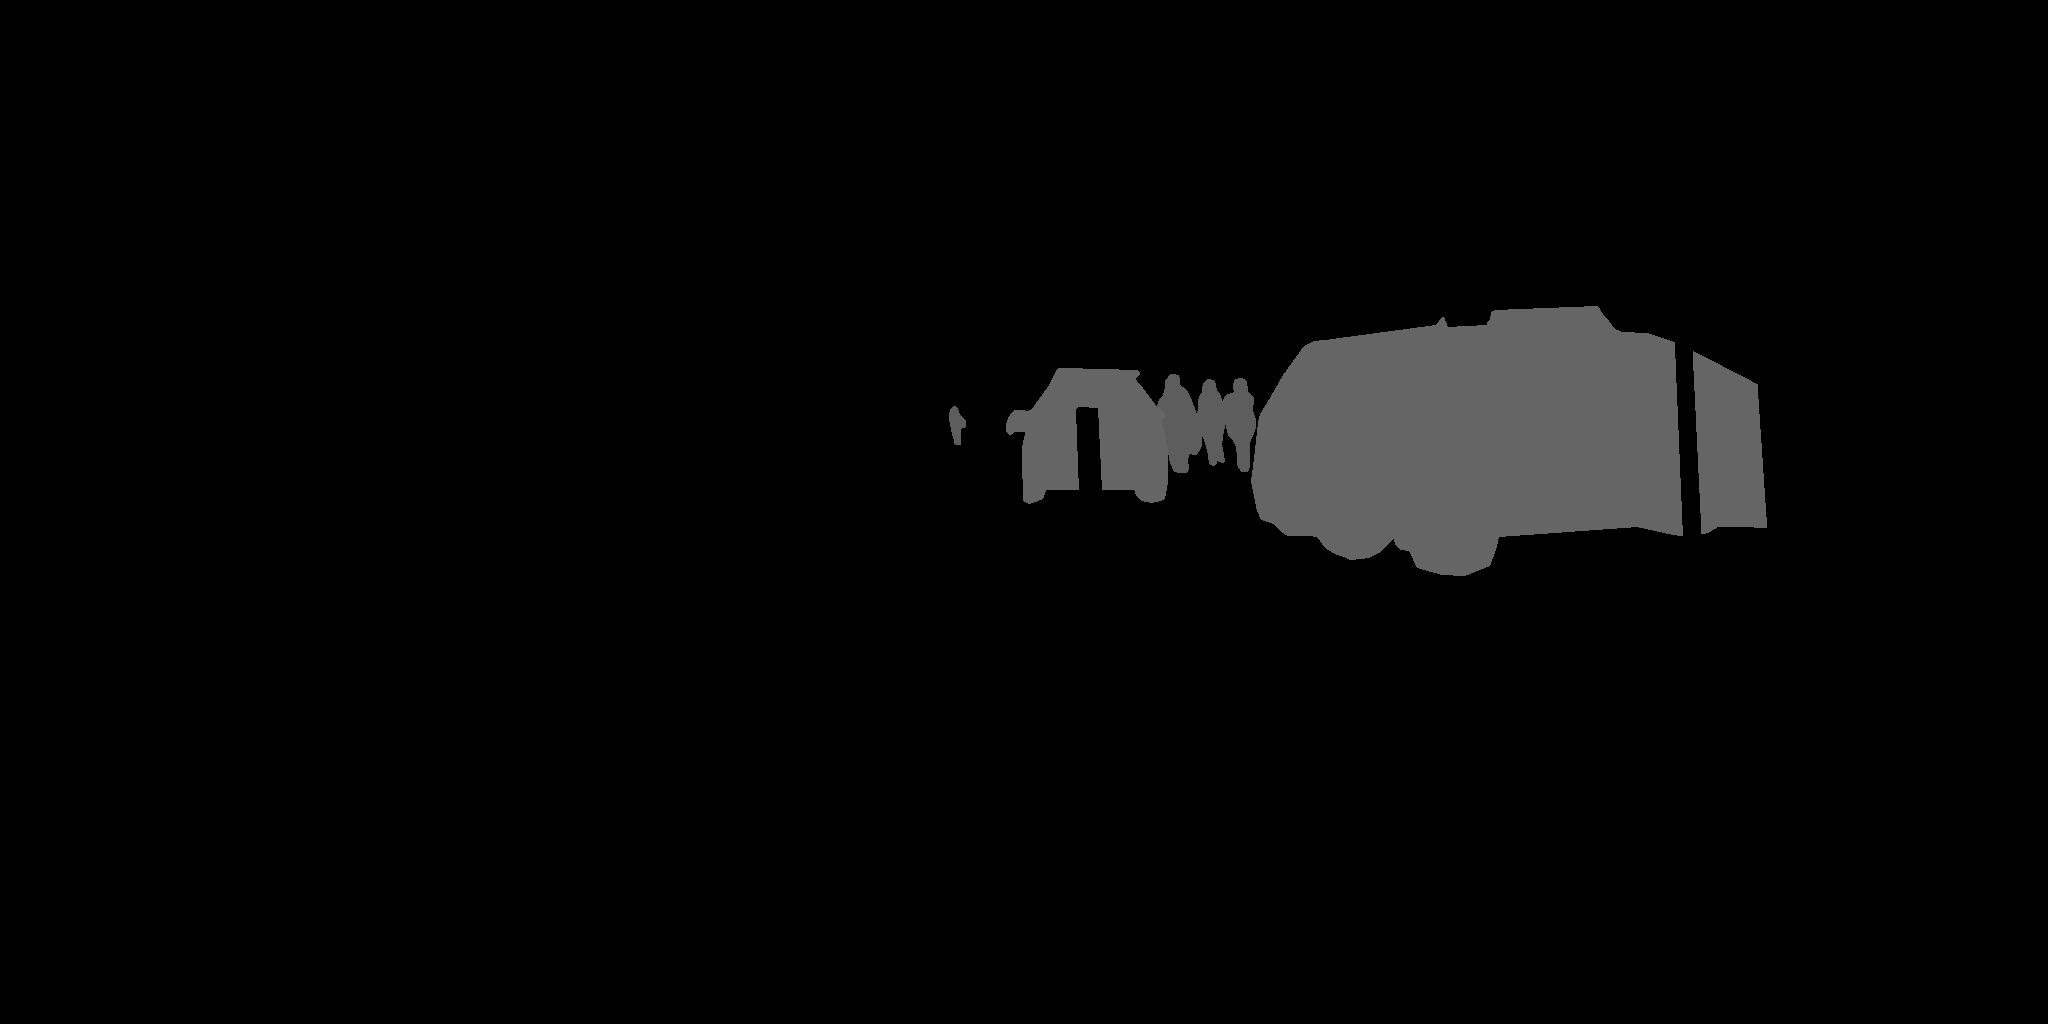

In [92]:
cityscapes_instance_semantic[0]["annotation_instanceids"]

**Convert annotations in polygonal format to png images with instance IDs, where pixels encode instance IDs composed of "train IDs".** - already done in detectron library cityscapes scripts

In [93]:
import numpy as np
np.array(cityscapes_instance_semantic[0]["annotation_instanceids"]).shape #instance annotations

(1024, 2048)

In [94]:
import numpy as np
np.unique(np.array(cityscapes_instance_semantic[0]["annotation_instanceids"]))

array([    1,     2,     3,     4,     7,     8,    11,    13,    17,
          20,    21,    23, 24000, 24001, 24002, 24003, 26000, 26001,
       26002], dtype=int32)

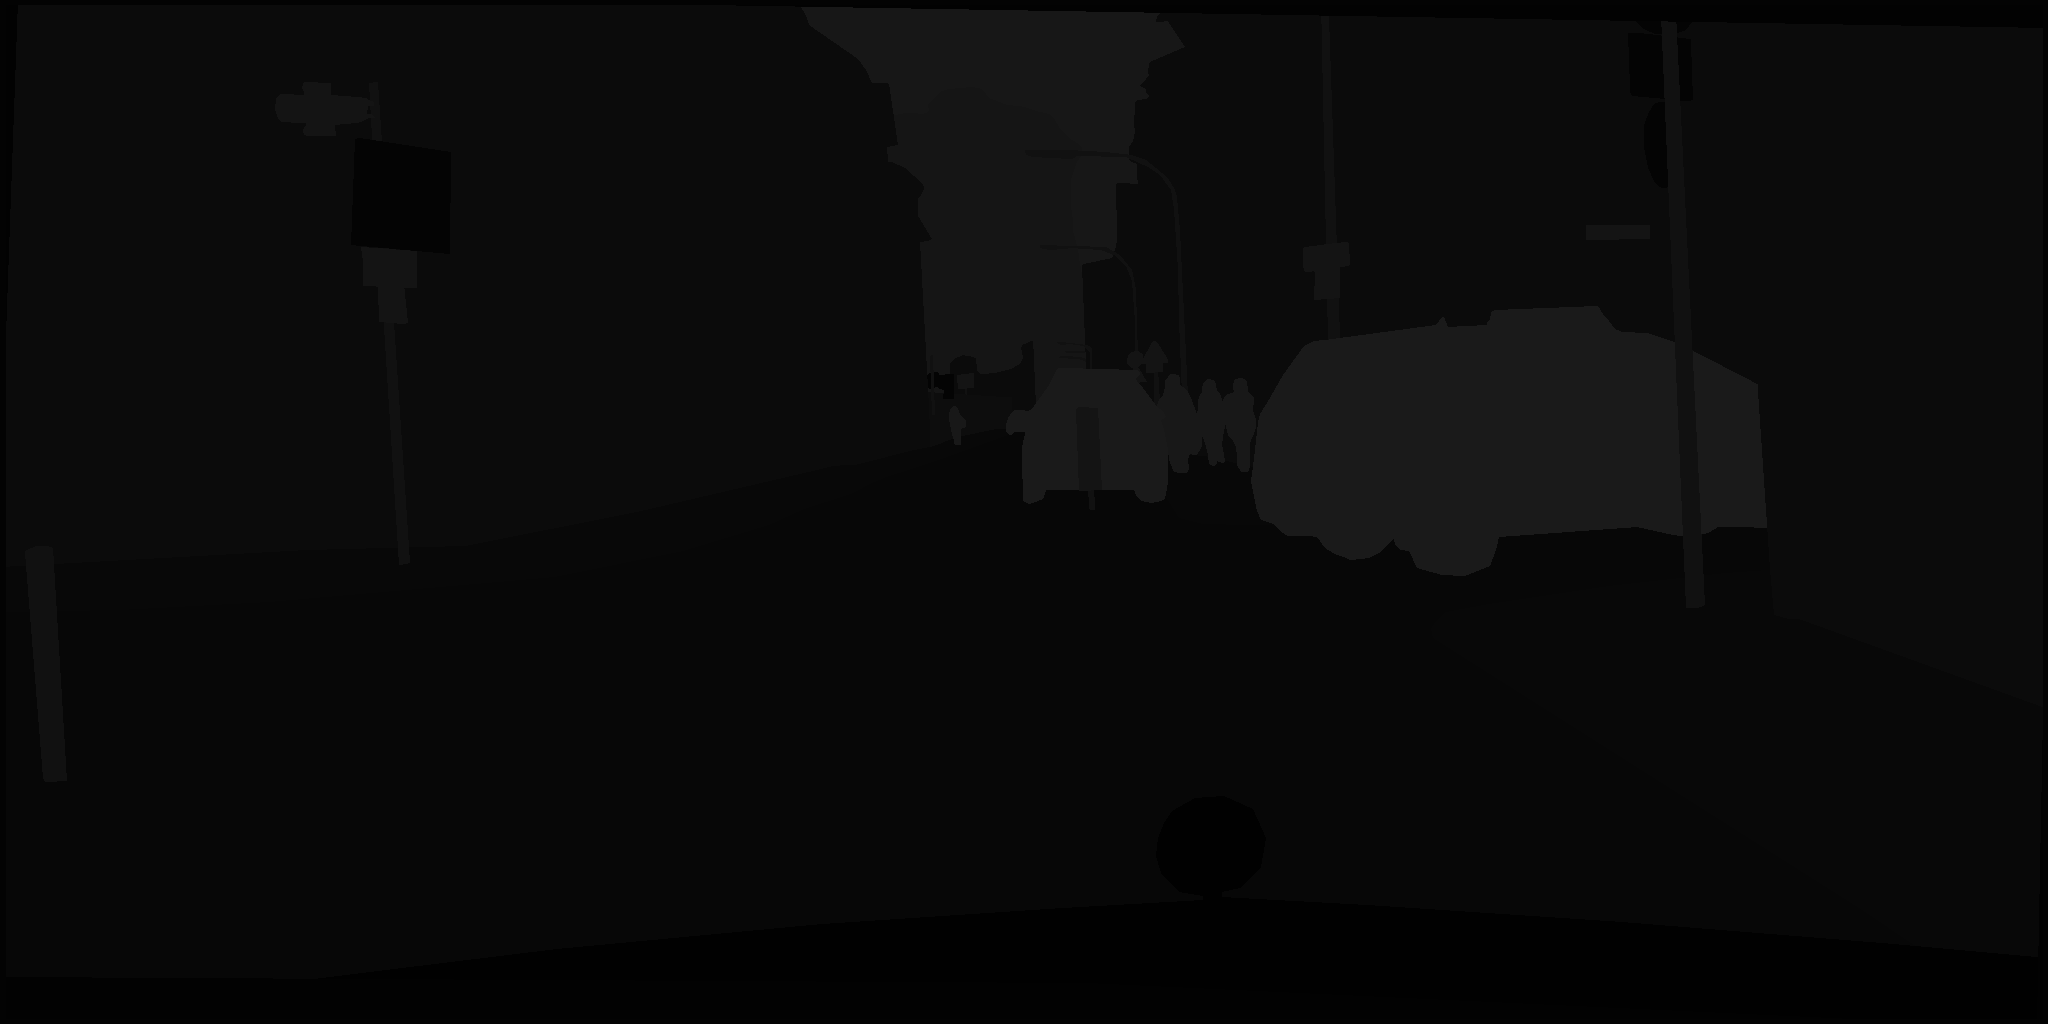

In [95]:
cityscapes_instance_semantic[0]["annotation_labelids"]

In [96]:
import numpy as np
np.array(cityscapes_instance_semantic[0]["annotation_labelids"]).shape #semantic annotations?

(1024, 2048)

In [97]:
import numpy as np
np.unique(np.array(cityscapes_instance_semantic[0]["annotation_labelids"]))

array([ 1,  2,  3,  4,  7,  8, 11, 13, 17, 20, 21, 23, 24, 26],
      dtype=uint8)

**Converted annotations in polygonal format to png images with label IDs, where pixels encode "train IDs" that you can define in labels.py in cityscape scripts. This is already done**

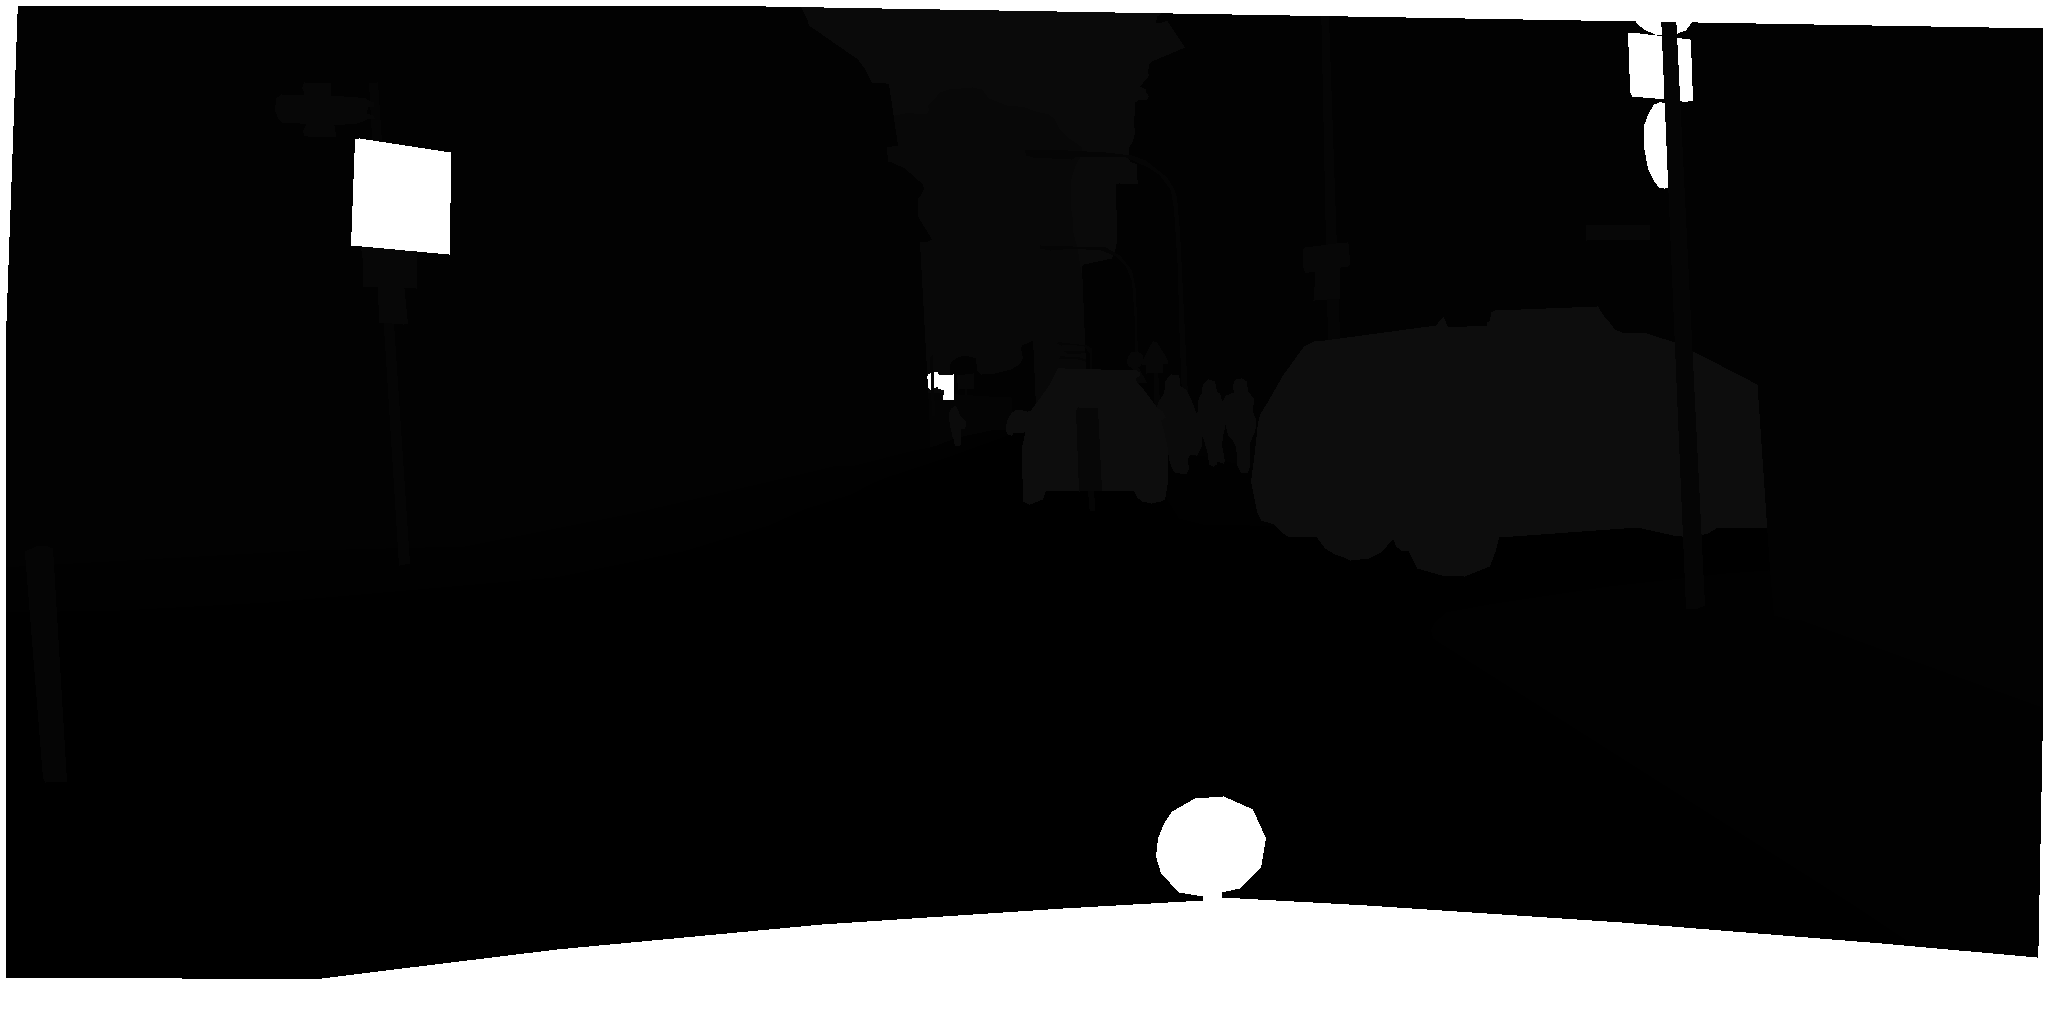

In [98]:
cityscapes_instance_semantic[0]["annotation_labeltrainids"]

In [99]:
import numpy as np
np.array(cityscapes_instance_semantic[0]["annotation_labeltrainids"]).shape #semantic annotations

(1024, 2048)

In [100]:
import numpy as np
np.unique(np.array(cityscapes_instance_semantic[0]["annotation_labeltrainids"]))

array([  0,   1,   2,   4,   5,   7,   8,  10,  11,  13, 255], dtype=uint8)

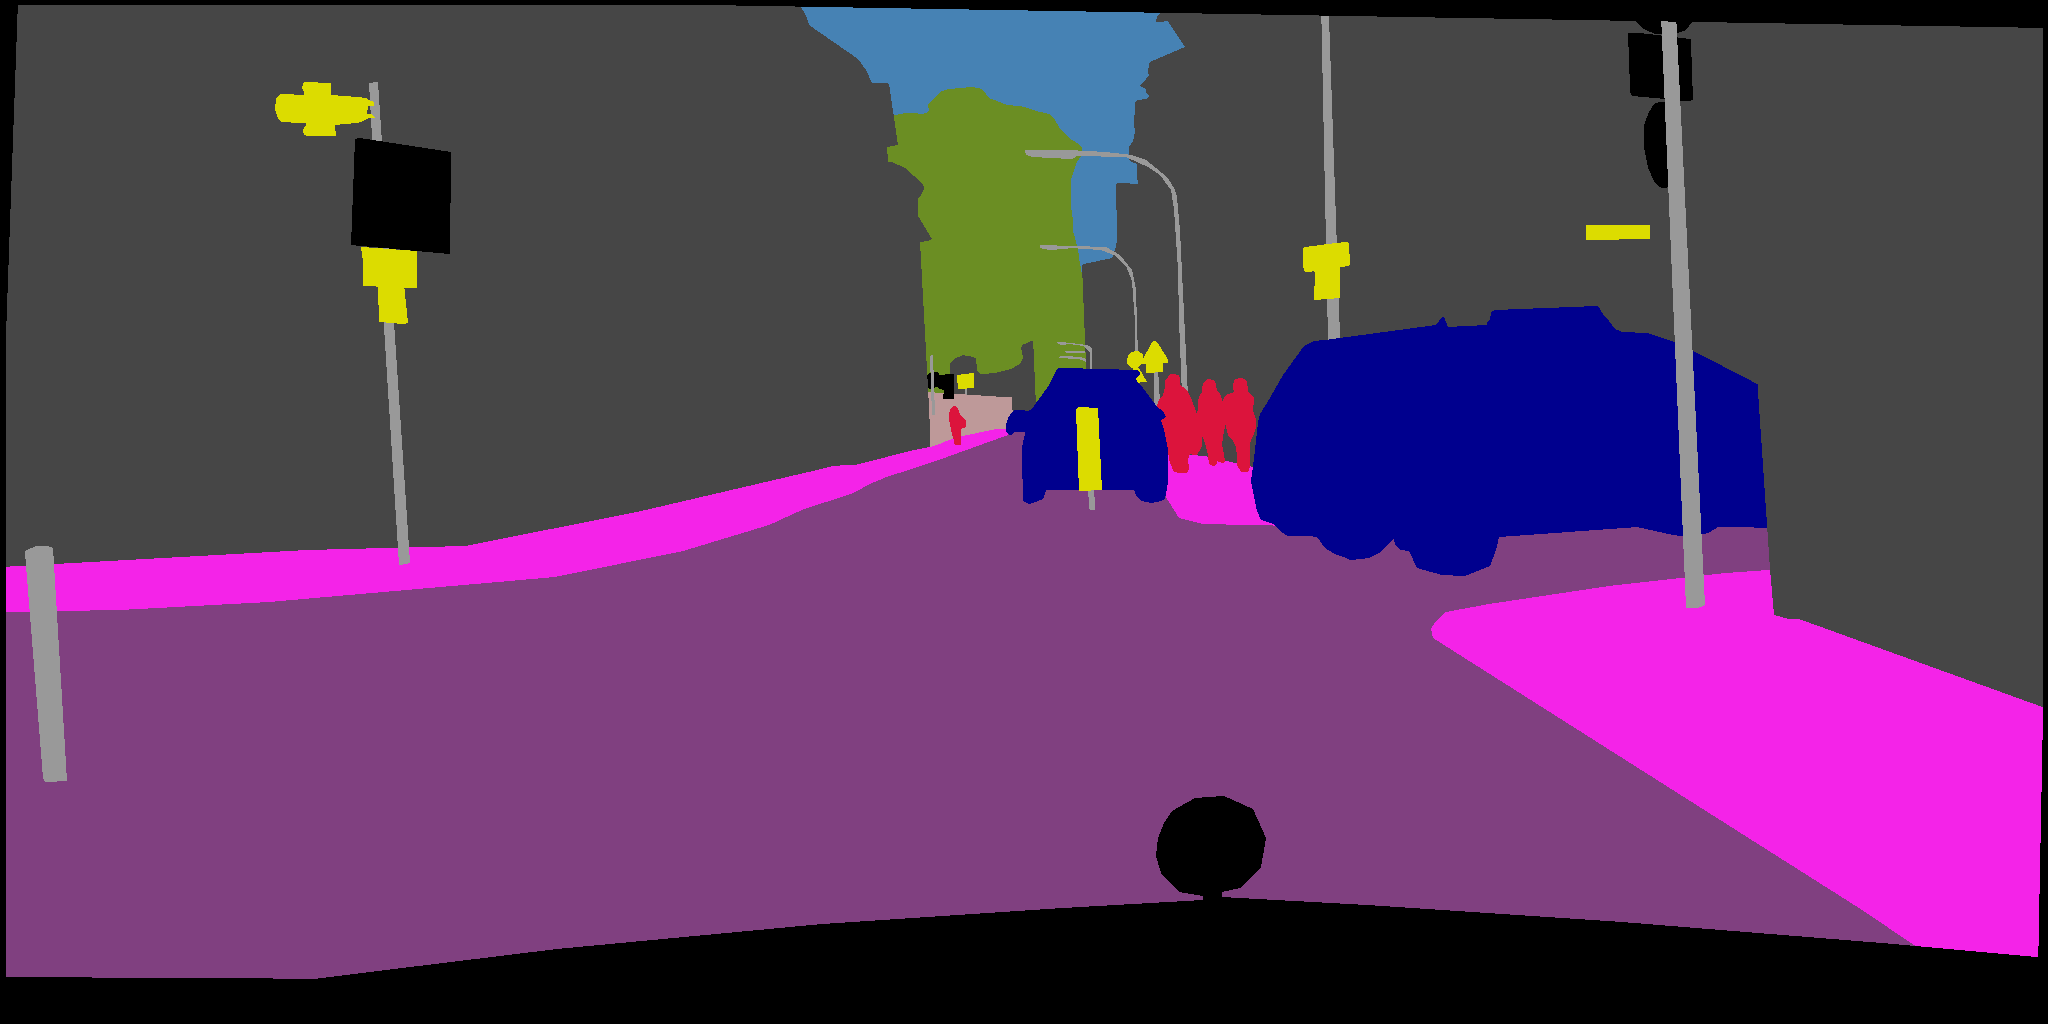

In [101]:
cityscapes_instance_semantic[0]["annotation_color"]

In [102]:
import numpy as np
np.array(cityscapes_instance_semantic[0]["annotation_color"]).shape #panoptic?

(1024, 2048, 4)

In [37]:
import numpy as np
np.unique(np.array(cityscapes_instance_semantic[0]["annotation_color"])[:,:,0])

array([  0,  70, 107, 128, 153, 190, 220, 244], dtype=uint8)

In [38]:
import numpy as np
np.unique(np.array(cityscapes_instance_semantic[0]["annotation_color"])[:,:,1])

array([  0,  20,  35,  64,  70, 130, 142, 153, 220], dtype=uint8)

In [39]:
import numpy as np
np.unique(np.array(cityscapes_instance_semantic[0]["annotation_color"])[:,:,2])

array([  0,  35,  60,  70, 128, 142, 153, 180, 232], dtype=uint8)

In [40]:
import numpy as np
np.unique(np.array(cityscapes_instance_semantic[0]["annotation_color"])[:,:,3]), np.array(cityscapes_instance_semantic[0]["annotation_color"])[:,:,3].shape

(array([255], dtype=uint8), (1024, 2048))

In [105]:
import datasets, transformers
from datasets import load_dataset

cityscapes_instance_semantic = load_dataset("BhavanaMalla/cityscapes-instance-semantic",
                                            token="yourtoken")

In [106]:
cityscapes_instance_semantic

DatasetDict({
    train: Dataset({
        features: ['image', 'annotation_color', 'annotation_instanceids', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
        num_rows: 2975
    })
    validation: Dataset({
        features: ['image', 'annotation_color', 'annotation_instanceids', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
        num_rows: 500
    })
    test: Dataset({
        features: ['image', 'annotation_color', 'annotation_instanceids', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
        num_rows: 1525
    })
})

In [ ]:
# Define the color map
palette = np.array([
    (128, 64, 128),  # Road
    (244, 35, 232),  # Sidewalk
    (70, 70, 70),    # Building
    (102, 102, 156), # Wall
    (190, 153, 153), # Fence
    (153, 153, 153), # Pole
    (250, 170, 30),  # Traffic light
    (220, 220, 0),   # Traffic sign
    (107, 142, 35),  # Vegetation
    (152, 251, 152), # Terrain
    (70, 130, 180),  # Sky
    (220, 20, 60),   # Person
    (255, 0, 0),     # Rider
    (0, 0, 142),     # Car
    (0, 0, 70),      # Truck
    (0, 60, 100),    # Bus
    (0, 80, 100),    # Train
    (0, 0, 230),     # Motorcycle
    (119, 11, 32)    # Bicycle
])

In [ ]:
# Plot the preds
import matplotlib.pyplot as plt

def plot_predictions(images, ground_truth_mask, predicted_mask, palette):
    palette = np.array(palette)
    num_images = len(images)
    cols = 3  # 3 cols: original image, gt mask, segmentation mask

    # Create a subplot with num_images rows and 3 columns, make it 5 if you want classes
    fig, axes = plt.subplots(num_images, cols, figsize=(15, 5*num_images))
    print(axes.shape)

    # Ensure axes is always 2D
    if num_images == 1:
        axes = np.expand_dims(axes, axis=0)

    # Titles
    axes[0, 0].set_title("Original Image")
    axes[0, 1].set_title("Ground Truth Mask")
    axes[0, 2].set_title("Predicted Mask")

    for i, (img, gt_mask, pred_mask) in enumerate(zip(images, ground_truth_mask, predicted_mask)):
        color_seg = np.zeros((pred_mask.shape[0], pred_mask.shape[1], 3), dtype=np.uint8) # height, width, 3
        color_seg_gt = np.zeros((pred_mask.shape[0], pred_mask.shape[1], 3), dtype=np.uint8)
        for label, color in enumerate(palette):
            color_seg[pred_mask == label, :] = color
            color_seg_gt[gt_mask == label, :] = color

        # Convert to BGR
        color_seg = color_seg[..., ::-1]
        color_seg_gt = color_seg_gt[..., ::-1]

        # Show image + mask of prediction
        img_pred = np.array(img) * 0.5 + color_seg * 0.5
        img_pred = img_pred.astype(np.uint8)

        # Show image + mask of gt
        img_gt = np.array(img) * 0.5 + color_seg_gt * 0.5
        img_gt = img_gt.astype(np.uint8)

        # Plot original image
        axes[i, 0].imshow(img)
        # Plot ground truth mask
        axes[i, 1].imshow(img_gt)
        # Plot predicted mask
        axes[i, 2].imshow(img_pred)

    for ax in axes.flat:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

In [117]:
np.unique(np.array(cityscapes_instance_semantic["train"][0]["annotation_labeltrainids"])), np.unique(np.array(cityscapes_instance_semantic["train"][0]["annotation_labelids"]))

(array([  0,   1,   2,   5,   7,   8,   9,  10,  11,  12,  13,  18, 255],
       dtype=uint8),
 array([ 0,  1,  3,  4,  7,  8, 11, 17, 20, 21, 22, 23, 24, 25, 26, 33],
       dtype=uint8))

(2, 3)


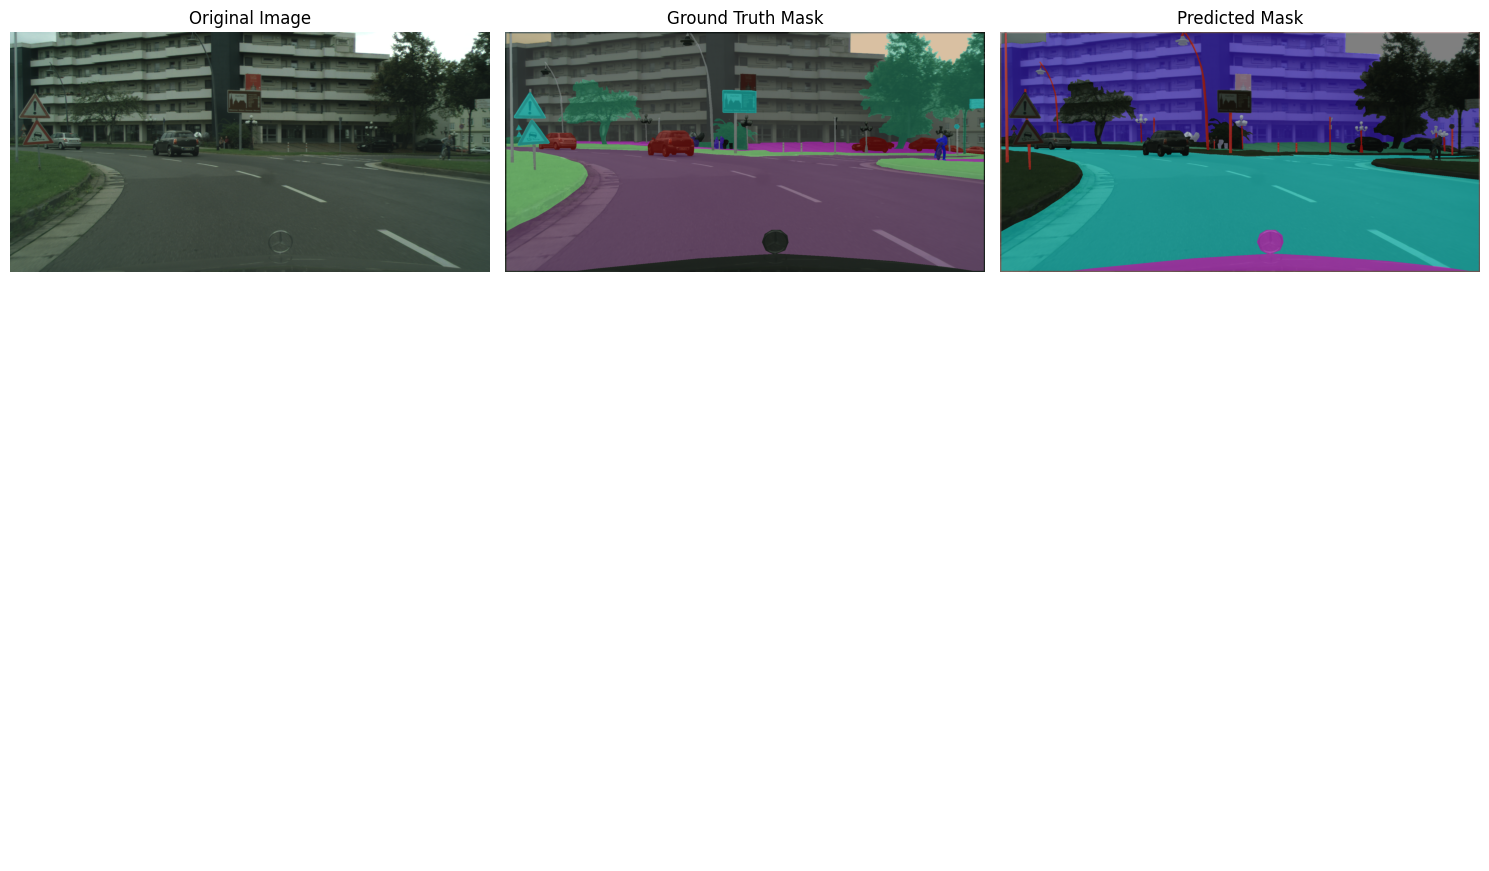

In [112]:
plot_predictions(images=[np.array(cityscapes_instance_semantic["train"][0]["image"])],
                 ground_truth_mask=[np.array(cityscapes_instance_semantic["train"][0]["annotation_labeltrainids"])],
                 predicted_mask=[np.array(cityscapes_instance_semantic["train"][0]["annotation_labelids"])],  # annotation_labelids for now
                 palette=palette)

In [115]:
np.unique(np.array(cityscapes_instance_semantic["validation"][0]["annotation_labeltrainids"])), np.unique(np.array(cityscapes_instance_semantic["validation"][0]["annotation_labelids"]))

(array([  0,   1,   2,   4,   5,   7,   8,  10,  11,  13, 255], dtype=uint8),
 array([ 1,  2,  3,  4,  7,  8, 11, 13, 17, 20, 21, 23, 24, 26],
       dtype=uint8))

(2, 3)


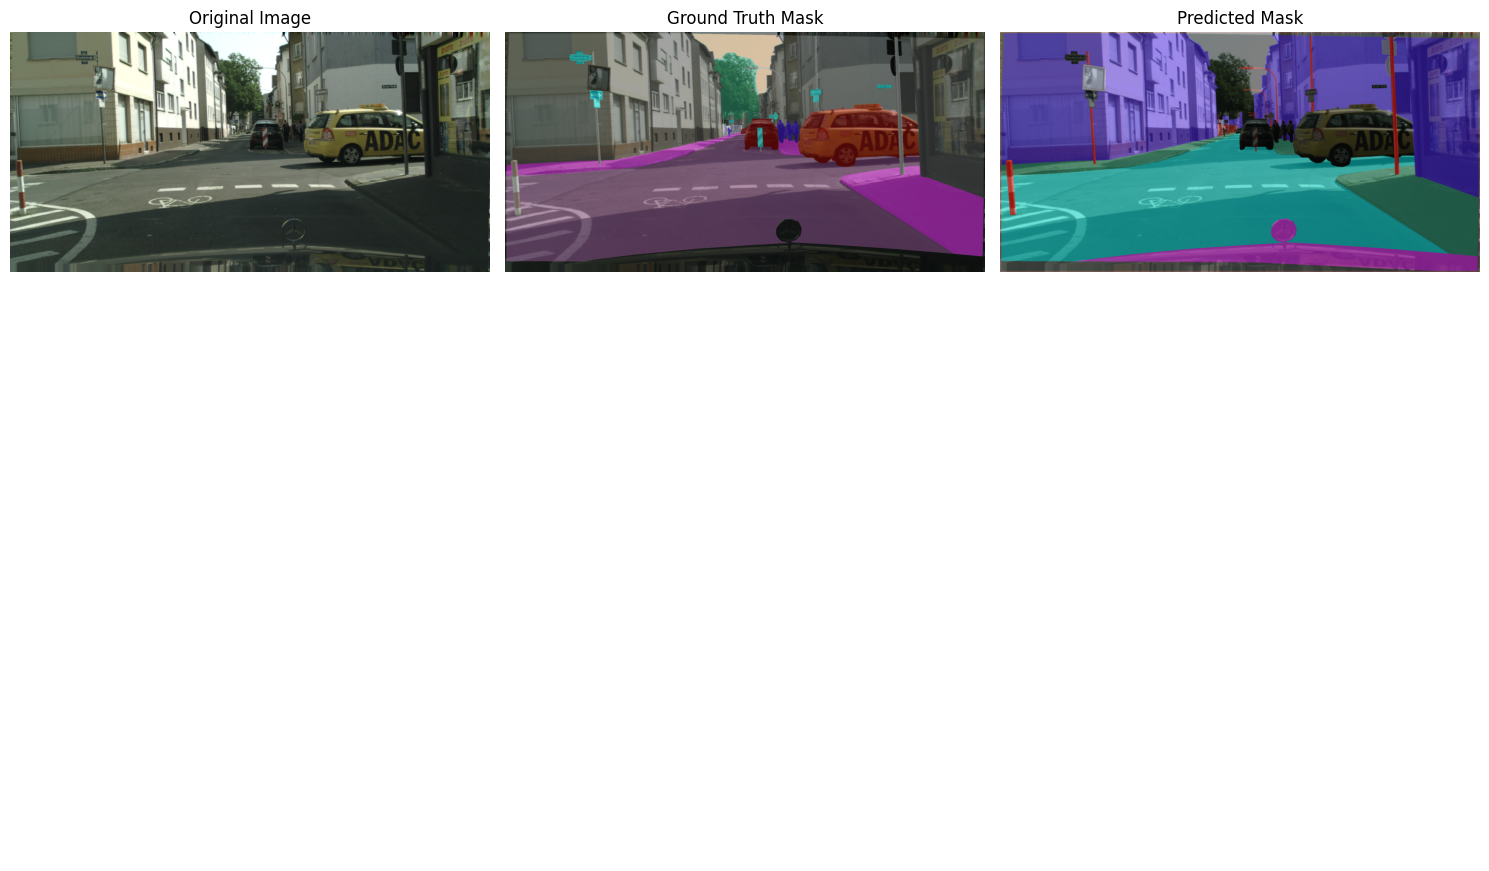

In [113]:
plot_predictions(images=[np.array(cityscapes_instance_semantic["validation"][0]["image"])],
                 ground_truth_mask=[np.array(cityscapes_instance_semantic["validation"][0]["annotation_labeltrainids"])],
                 predicted_mask=[np.array(cityscapes_instance_semantic["validation"][0]["annotation_labelids"])],  # annotation_labelids for now
                 palette=palette)

In [116]:
np.unique(np.array(cityscapes_instance_semantic["test"][0]["annotation_labeltrainids"])), np.unique(np.array(cityscapes_instance_semantic["test"][0]["annotation_labelids"]))

(array([255], dtype=uint8), array([0, 1, 3], dtype=uint8))

(2, 3)


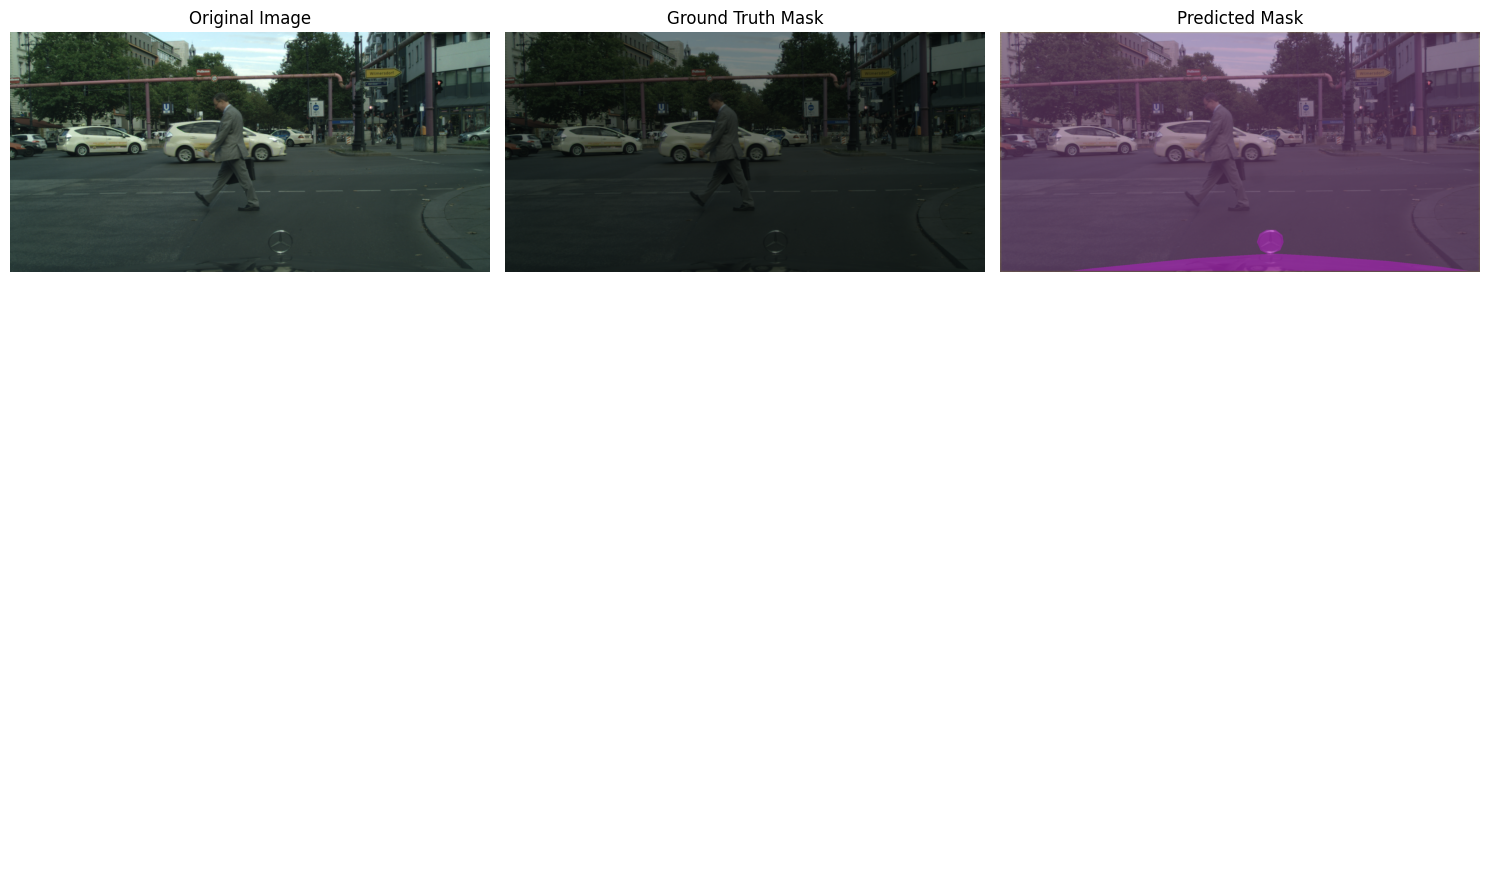

In [114]:
plot_predictions(images=[np.array(cityscapes_instance_semantic["test"][2]["image"])],
                 ground_truth_mask=[np.array(cityscapes_instance_semantic["test"][2]["annotation_labeltrainids"])],
                 predicted_mask=[np.array(cityscapes_instance_semantic["test"][2]["annotation_labelids"])],  # annotation_labelids for now
                 palette=palette)

# You can't test cityscapes, the test dataset is not public.So the images in test set are all black.

**Committing instance and semantic annotations separately**

In [ ]:
#if you want to access that zip from drive
from google.colab import drive
import zipfile
import os
from pathlib import Path

# Mount Google Drive
drive.mount('/content/drive')

# Specify the paths
zip_filename = 'cityscapes.zip'
source_path = '/content/drive/MyDrive/Colab Notebooks/Master Thesis/Data/'  # Adjust this path

# Unzip the file
zip_file_path = os.path.join(source_path, zip_filename)
destination_path = Path('/content/datasets/cityscapes')

if not destination_path.is_dir():
    destination_path = Path(destination_path)
    destination_path.mkdir(exist_ok=True, parents=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_path)

Mounted at /content/drive


In [44]:
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_cityscapes_dataset_dict(data_root):
    dataset_dict = {"image": [], "annotation_color": [],
                    "annotation_instanceids":[], "split": [], "image_name": []}
    splits = ["train", "val", "test"]

    for split in splits:
        image_dir = os.path.join(data_root, "leftImg8bit", split)
        annotation_dir = os.path.join(data_root, "gtFine", split)

        # Iterate over cities and images in the split
        for city_folder in os.listdir(image_dir):
            city_path = os.path.join(image_dir, city_folder)
            for image_file in os.listdir(city_path):
                image_path = os.path.join(city_path, image_file)

                if image_file.endswith("_leftImg8bit.png"):  # Ensure it matches the specific suffix
                    image_name = image_file.replace("_leftImg8bit.png", "")
                    print(image_name)

                annotation_color_file = image_file.replace("_leftImg8bit.png", "_gtFine_color.png")
                annotation_instanceids_file = image_file.replace("_leftImg8bit.png", "_gtFine_instanceIds.png")

                annotation_color_path = os.path.join(annotation_dir, city_folder, annotation_color_file)
                annotation_instanceids_path = os.path.join(annotation_dir, city_folder, annotation_instanceids_file)

                dataset_dict["image"].append(image_path)
                dataset_dict["annotation_color"].append(annotation_color_path)
                dataset_dict["annotation_instanceids"].append(annotation_instanceids_path)
                dataset_dict["split"].append(split)
                dataset_dict["image_name"].append(image_name)

    return dataset_dict


# Create DatasetDict for Cityscapes
data_root = "/content/datasets/cityscapes"
cityscapes_dataset_dict = create_cityscapes_dataset_dict(data_root)
print(cityscapes_dataset_dict.keys())
def create_dataset(image_paths, annotation_color, annotation_instanceids, image_names):
    dataset = Dataset.from_dict({"image": image_paths,
                                "annotation_color": annotation_color,
                                "annotation_instanceids": annotation_instanceids,
                                 "image_name": image_names
                                })
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("annotation_color", Image())
    dataset = dataset.cast_column("annotation_instanceids", Image())
    return dataset


train_dict = {k: [x for i, x in enumerate(v) if cityscapes_dataset_dict['split'][i]=='train']
                                      for k, v in cityscapes_dataset_dict.items()}
train_dataset = create_dataset(train_dict["image"],
                               train_dict["annotation_color"],
                               train_dict["annotation_instanceids"],
                               train_dict["image_name"],
                               )
val_dict = {k: [x for i, x in enumerate(v) if cityscapes_dataset_dict['split'][i]=='val']
                                      for k, v in cityscapes_dataset_dict.items()}
val_dataset = create_dataset(val_dict["image"],
                               val_dict["annotation_color"],
                               val_dict["annotation_instanceids"],
                               val_dict["image_name"],
                             )
test_dict = {k: [x for i, x in enumerate(v) if cityscapes_dataset_dict['split'][i]=='test']
                                      for k, v in cityscapes_dataset_dict.items()}
test_dataset = create_dataset(test_dict["image"],
                               test_dict["annotation_color"],
                               test_dict["annotation_instanceids"],
                               test_dict["image_name"],
                              )

dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
})

Streaming output truncated to the last 5000 lines.
zurich_000112_000019
zurich_000010_000019
zurich_000103_000019
zurich_000057_000019
zurich_000066_000019
zurich_000110_000019
zurich_000121_000019
zurich_000031_000019
zurich_000078_000019
zurich_000094_000019
zurich_000020_000019
zurich_000106_000019
zurich_000021_000019
zurich_000046_000019
zurich_000011_000019
zurich_000084_000019
zurich_000027_000019
zurich_000095_000019
zurich_000115_000019
zurich_000023_000019
zurich_000091_000019
zurich_000086_000019
zurich_000049_000019
zurich_000030_000019
zurich_000074_000019
zurich_000081_000019
zurich_000012_000019
zurich_000064_000019
zurich_000042_000019
zurich_000065_000019
zurich_000080_000019
zurich_000005_000019
zurich_000045_000019
zurich_000067_000019
zurich_000085_000019
zurich_000090_000019
zurich_000048_000019
zurich_000019_000019
zurich_000022_000019
zurich_000119_000019
zurich_000024_000019
zurich_000002_000019
zurich_000007_000019
zurich_000036_000019
zurich_000083_000019
zuri

In [45]:
dataset, dataset["validation"].features

(DatasetDict({
     train: Dataset({
         features: ['image', 'annotation_color', 'annotation_instanceids', 'image_name'],
         num_rows: 2975
     })
     validation: Dataset({
         features: ['image', 'annotation_color', 'annotation_instanceids', 'image_name'],
         num_rows: 500
     })
     test: Dataset({
         features: ['image', 'annotation_color', 'annotation_instanceids', 'image_name'],
         num_rows: 1525
     })
 }),
 {'image': Image(mode=None, decode=True, id=None),
  'annotation_color': Image(mode=None, decode=True, id=None),
  'annotation_instanceids': Image(mode=None, decode=True, id=None),
  'image_name': Value(dtype='string', id=None)})

In [46]:
# Push to the Hugging Face Model Hub
dataset.push_to_hub("BhavanaMalla/cityscapes-instance", private=True, token="yourtoken")

Uploading the dataset shards:   0%|          | 0/14 [00:00<?, ?it/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/167 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/167 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/166 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/7 [00:00<?, ?it/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/217 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/612 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/cityscapes-instance/commit/ccab5d038170c386e64f3d832de8c89ac8c97a3b', commit_message='Upload dataset', commit_description='', oid='ccab5d038170c386e64f3d832de8c89ac8c97a3b', pr_url=None, pr_revision=None, pr_num=None)

In [41]:
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_cityscapes_dataset_dict(data_root):
    dataset_dict = {"image": [], "annotation_labelids": [],
                    "annotation_labeltrainids": [], "split": [], "image_name": []}
    splits = ["train", "val", "test"]

    for split in splits:
        image_dir = os.path.join(data_root, "leftImg8bit", split)
        annotation_dir = os.path.join(data_root, "gtFine", split)

        # Iterate over cities and images in the split
        for city_folder in os.listdir(image_dir):
            city_path = os.path.join(image_dir, city_folder)
            for image_file in os.listdir(city_path):
                image_path = os.path.join(city_path, image_file)

                if image_file.endswith("_leftImg8bit.png"):  # Ensure it matches the specific suffix
                    image_name = image_file.replace("_leftImg8bit.png", "")
                    print(image_name)

                annotation_labelids_file = image_file.replace("_leftImg8bit.png", "_gtFine_labelIds.png")
                annotation_labeltrainids_file = image_file.replace("_leftImg8bit.png", "_gtFine_labelTrainIds.png")

                annotation_labelids_path = os.path.join(annotation_dir, city_folder, annotation_labelids_file)
                annotation_labeltrainids_path = os.path.join(annotation_dir, city_folder, annotation_labeltrainids_file)

                dataset_dict["image"].append(image_path)
                dataset_dict["annotation_labelids"].append(annotation_labelids_path)
                dataset_dict["annotation_labeltrainids"].append(annotation_labeltrainids_path)
                dataset_dict["split"].append(split)
                dataset_dict["image_name"].append(image_name)

    return dataset_dict


# Create DatasetDict for Cityscapes
data_root = "/content/datasets/cityscapes"
cityscapes_dataset_dict = create_cityscapes_dataset_dict(data_root)
print(cityscapes_dataset_dict.keys())
def create_dataset(image_paths, annotation_labelids, annotation_labeltrainids, image_names):
    dataset = Dataset.from_dict({"image": sorted(image_paths),
                                "annotation_labelids": sorted(annotation_labelids),
                                "annotation_labeltrainids": sorted(annotation_labeltrainids),
                                "image_name": sorted(image_names)
                                })
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("annotation_labelids", Image())
    dataset = dataset.cast_column("annotation_labeltrainids", Image())
    return dataset


train_dict = {k: [x for i, x in enumerate(v) if cityscapes_dataset_dict['split'][i]=='train']
                                      for k, v in cityscapes_dataset_dict.items()}
train_dataset = create_dataset(train_dict["image"],
                               train_dict["annotation_labelids"],
                               train_dict["annotation_labeltrainids"],
                               train_dict["image_name"],
                               )
val_dict = {k: [x for i, x in enumerate(v) if cityscapes_dataset_dict['split'][i]=='val']
                                      for k, v in cityscapes_dataset_dict.items()}
val_dataset = create_dataset(val_dict["image"],
                               val_dict["annotation_labelids"],
                               val_dict["annotation_labeltrainids"],
                               val_dict["image_name"],
                             )
test_dict = {k: [x for i, x in enumerate(v) if cityscapes_dataset_dict['split'][i]=='test']
                                      for k, v in cityscapes_dataset_dict.items()}
test_dataset = create_dataset(test_dict["image"],
                               test_dict["annotation_labelids"],
                               test_dict["annotation_labeltrainids"],
                               test_dict["image_name"],
                              )

dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
})

Streaming output truncated to the last 5000 lines.
zurich_000112_000019
zurich_000010_000019
zurich_000103_000019
zurich_000057_000019
zurich_000066_000019
zurich_000110_000019
zurich_000121_000019
zurich_000031_000019
zurich_000078_000019
zurich_000094_000019
zurich_000020_000019
zurich_000106_000019
zurich_000021_000019
zurich_000046_000019
zurich_000011_000019
zurich_000084_000019
zurich_000027_000019
zurich_000095_000019
zurich_000115_000019
zurich_000023_000019
zurich_000091_000019
zurich_000086_000019
zurich_000049_000019
zurich_000030_000019
zurich_000074_000019
zurich_000081_000019
zurich_000012_000019
zurich_000064_000019
zurich_000042_000019
zurich_000065_000019
zurich_000080_000019
zurich_000005_000019
zurich_000045_000019
zurich_000067_000019
zurich_000085_000019
zurich_000090_000019
zurich_000048_000019
zurich_000019_000019
zurich_000022_000019
zurich_000119_000019
zurich_000024_000019
zurich_000002_000019
zurich_000007_000019
zurich_000036_000019
zurich_000083_000019
zuri

In [42]:
dataset, dataset["validation"].features

(DatasetDict({
     train: Dataset({
         features: ['image', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
         num_rows: 2975
     })
     validation: Dataset({
         features: ['image', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
         num_rows: 500
     })
     test: Dataset({
         features: ['image', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
         num_rows: 1525
     })
 }),
 {'image': Image(mode=None, decode=True, id=None),
  'annotation_labelids': Image(mode=None, decode=True, id=None),
  'annotation_labeltrainids': Image(mode=None, decode=True, id=None),
  'image_name': Value(dtype='string', id=None)})

In [43]:
# Push to the Hugging Face Model Hub
dataset.push_to_hub("BhavanaMalla/cityscapes-semantic", private=True, token="yourhftoken")

Uploading the dataset shards:   0%|          | 0/14 [00:00<?, ?it/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/213 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/167 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/167 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/166 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/7 [00:00<?, ?it/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/217 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/615 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/cityscapes-semantic/commit/0bf4da59d51ea0bbba20d3db07475f44c44ec3d8', commit_message='Upload dataset', commit_description='', oid='0bf4da59d51ea0bbba20d3db07475f44c44ec3d8', pr_url=None, pr_revision=None, pr_num=None)

In [76]:
import datasets, transformers
from datasets import load_dataset

cityscapes_semantic = load_dataset("BhavanaMalla/cityscapes-semantic", split="test", token="yourtoken")

# You can't test cityscapes, the test dataset is not public.So the images in test set are all black.

In [88]:
cityscapes_semantic, cityscapes_semantic.features

(Dataset({
     features: ['image', 'annotation_labelids', 'annotation_labeltrainids', 'image_name'],
     num_rows: 1525
 }),
 {'image': Image(mode=None, decode=True, id=None),
  'annotation_labelids': Image(mode=None, decode=True, id=None),
  'annotation_labeltrainids': Image(mode=None, decode=True, id=None),
  'image_name': Value(dtype='string', id=None)})

In [81]:
np.unique(np.array(cityscapes_semantic[0]["annotation_labeltrainids"])), np.unique(np.array(cityscapes_semantic[0]["annotation_labelids"]))

(array([255], dtype=uint8), array([0, 1, 3], dtype=uint8))

In [84]:
cityscapes_semantic[0]["image"]

Output hidden; open in https://colab.research.google.com to view.

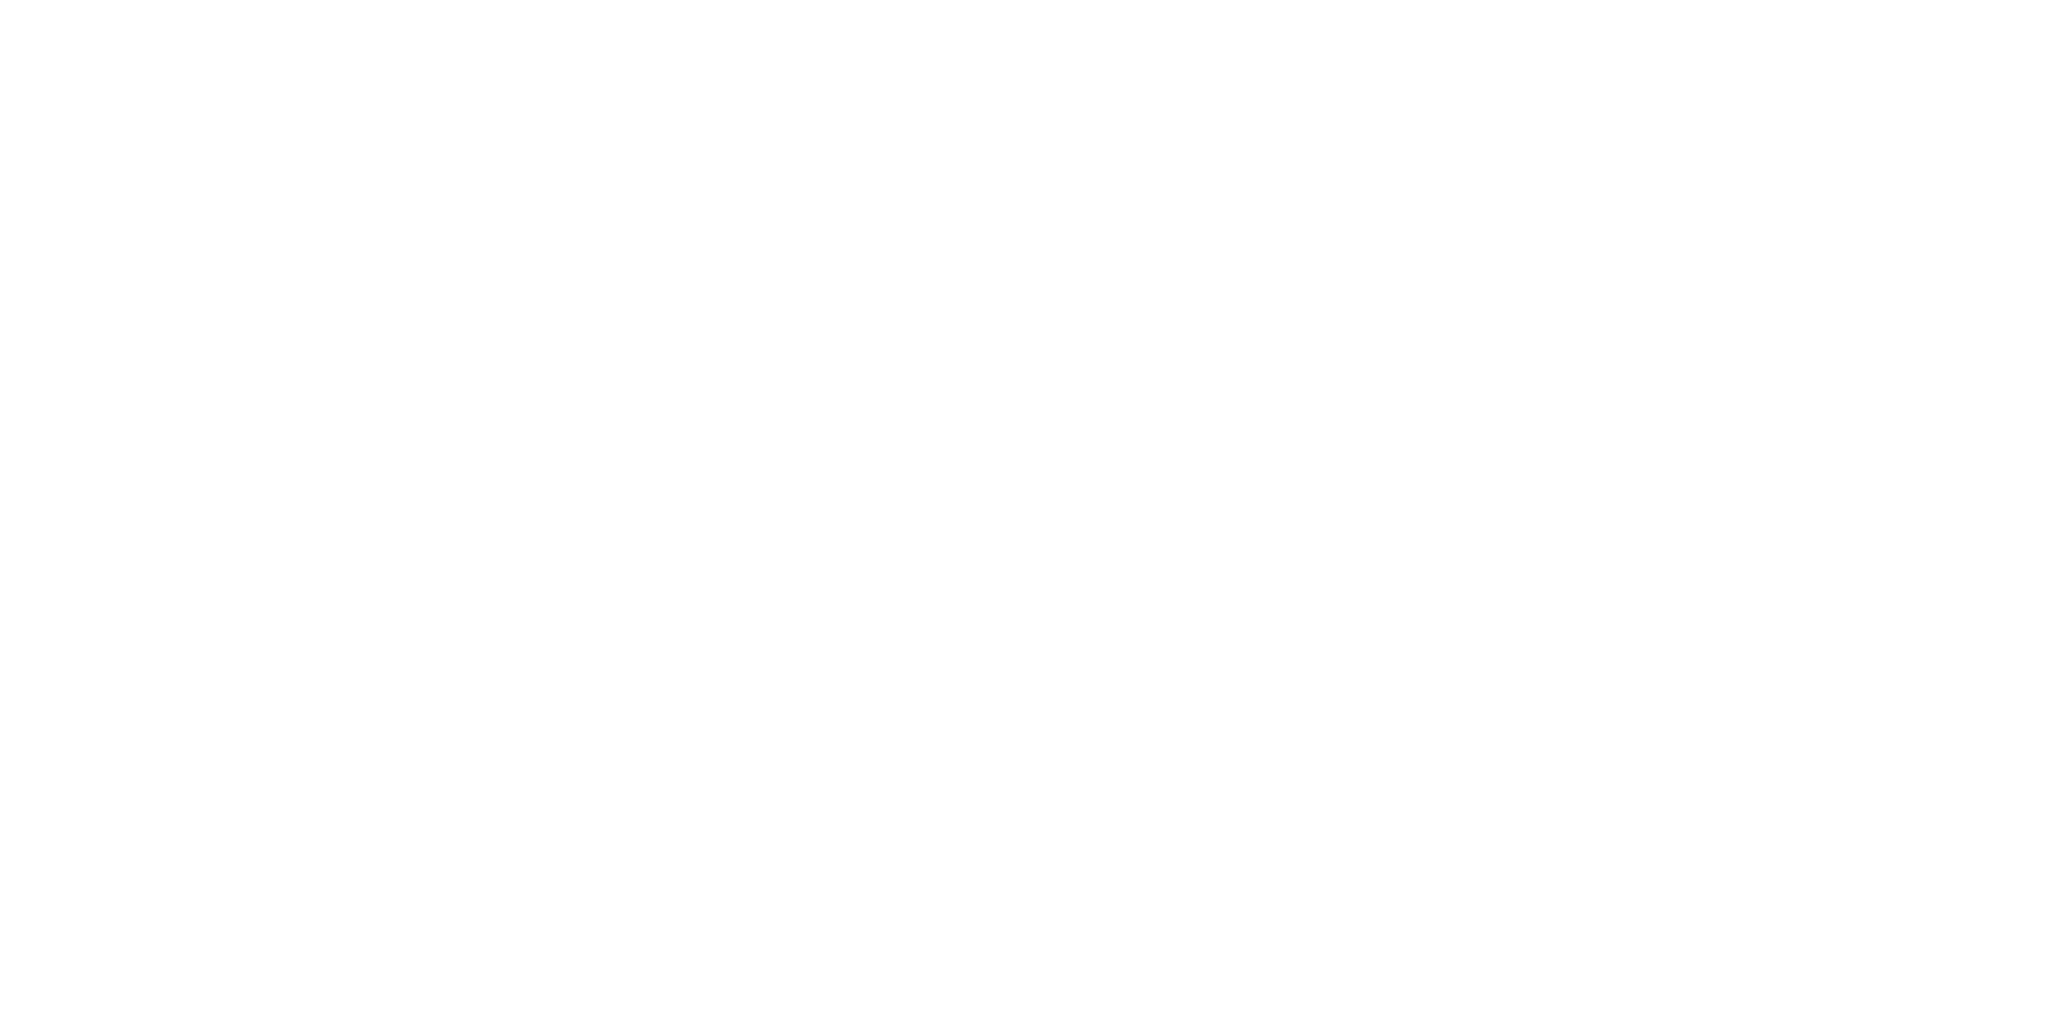

In [85]:
cityscapes_semantic[1]["annotation_labeltrainids"]

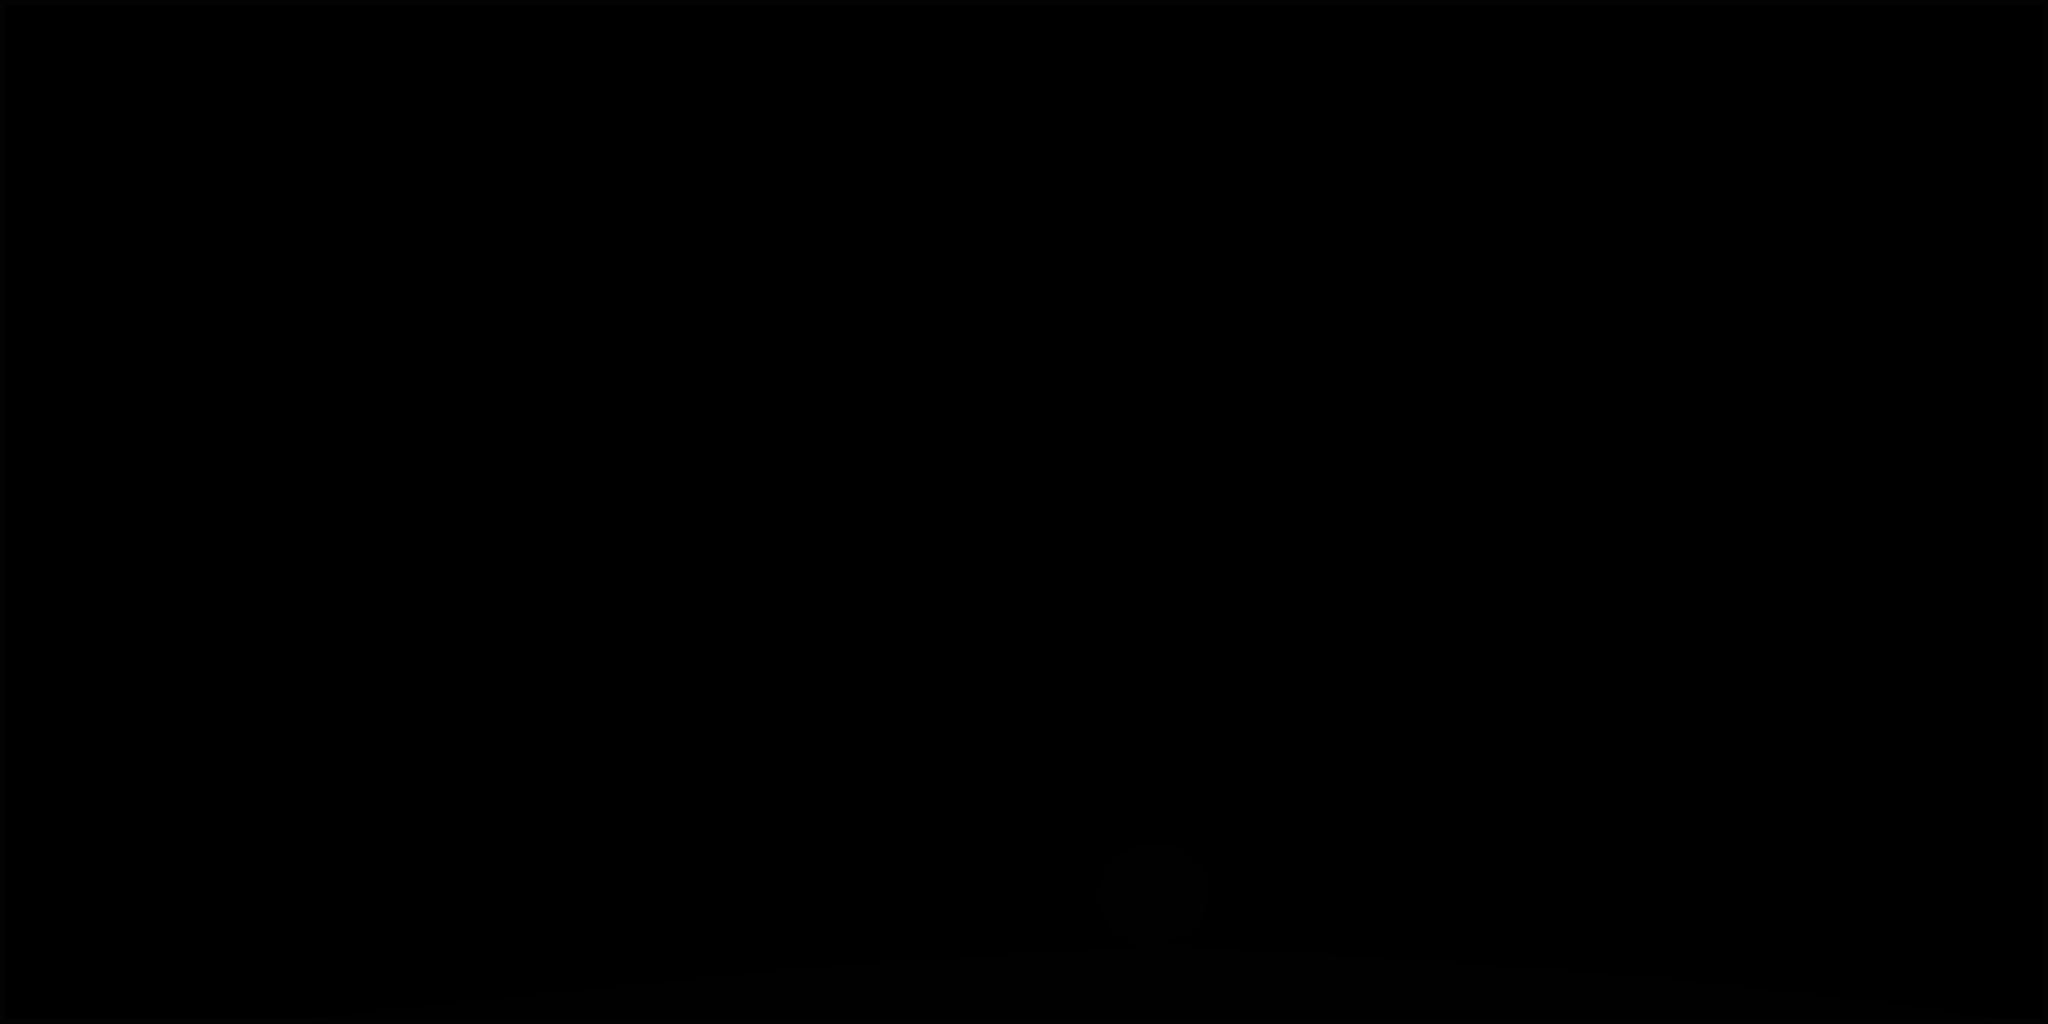

In [87]:
cityscapes_semantic[2]["annotation_labelids"]